### **EDA ON SPAM EMAIL DATASET**

## About the Dataset
The dataset 'Spam Email' contains 2 columns, each are:
- Category: Whether it is spam or ham

- Message: context of message

## 2. Notebook Objectives

Goal of this notebook is to:

1. 📊Explore each columns' distribution in the dataset

2. 📉Analysis on ham messages

3. 📈Analysis on spam messages

## **1. Load Necessary Libraries and Dataset**

In [1]:
# for data
import pandas as pd
import numpy as np

# for visualization
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import plotly.express as px
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import plotly.graph_objs as go
from wordcloud import WordCloud


# nltk used for NLP and word processing
import nltk
from nltk.util import ngrams
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Data Preprocessing (sklearn)
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

# Data Modeling
from sklearn.ensemble import RandomForestClassifier
#from lightgbm.sklearn import LGBMClassifier
#import xgboost as xgb
#from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Neural Network
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Bidirectional, Conv1D, MaxPooling1D, Embedding, LSTM, GlobalMaxPooling1D, Dropout, SimpleRNN, Flatten, Input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam


# scoring
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, RocCurveDisplay, auc

# Checking Training Time
import time

# styling
plt.style.use('ggplot')

In [2]:
# Loading our Dataset into a dataframe
df = pd.read_csv('spam.csv')
df.head()

Category                                            Message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...

In [3]:
# Checking Basic info of the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [4]:
# Checking the shape of the data
print(f"This data contains {df.shape[0]} rows and {df.shape[1]} columns. ")

This data contains 5572 rows and 2 columns. 


No missing Value


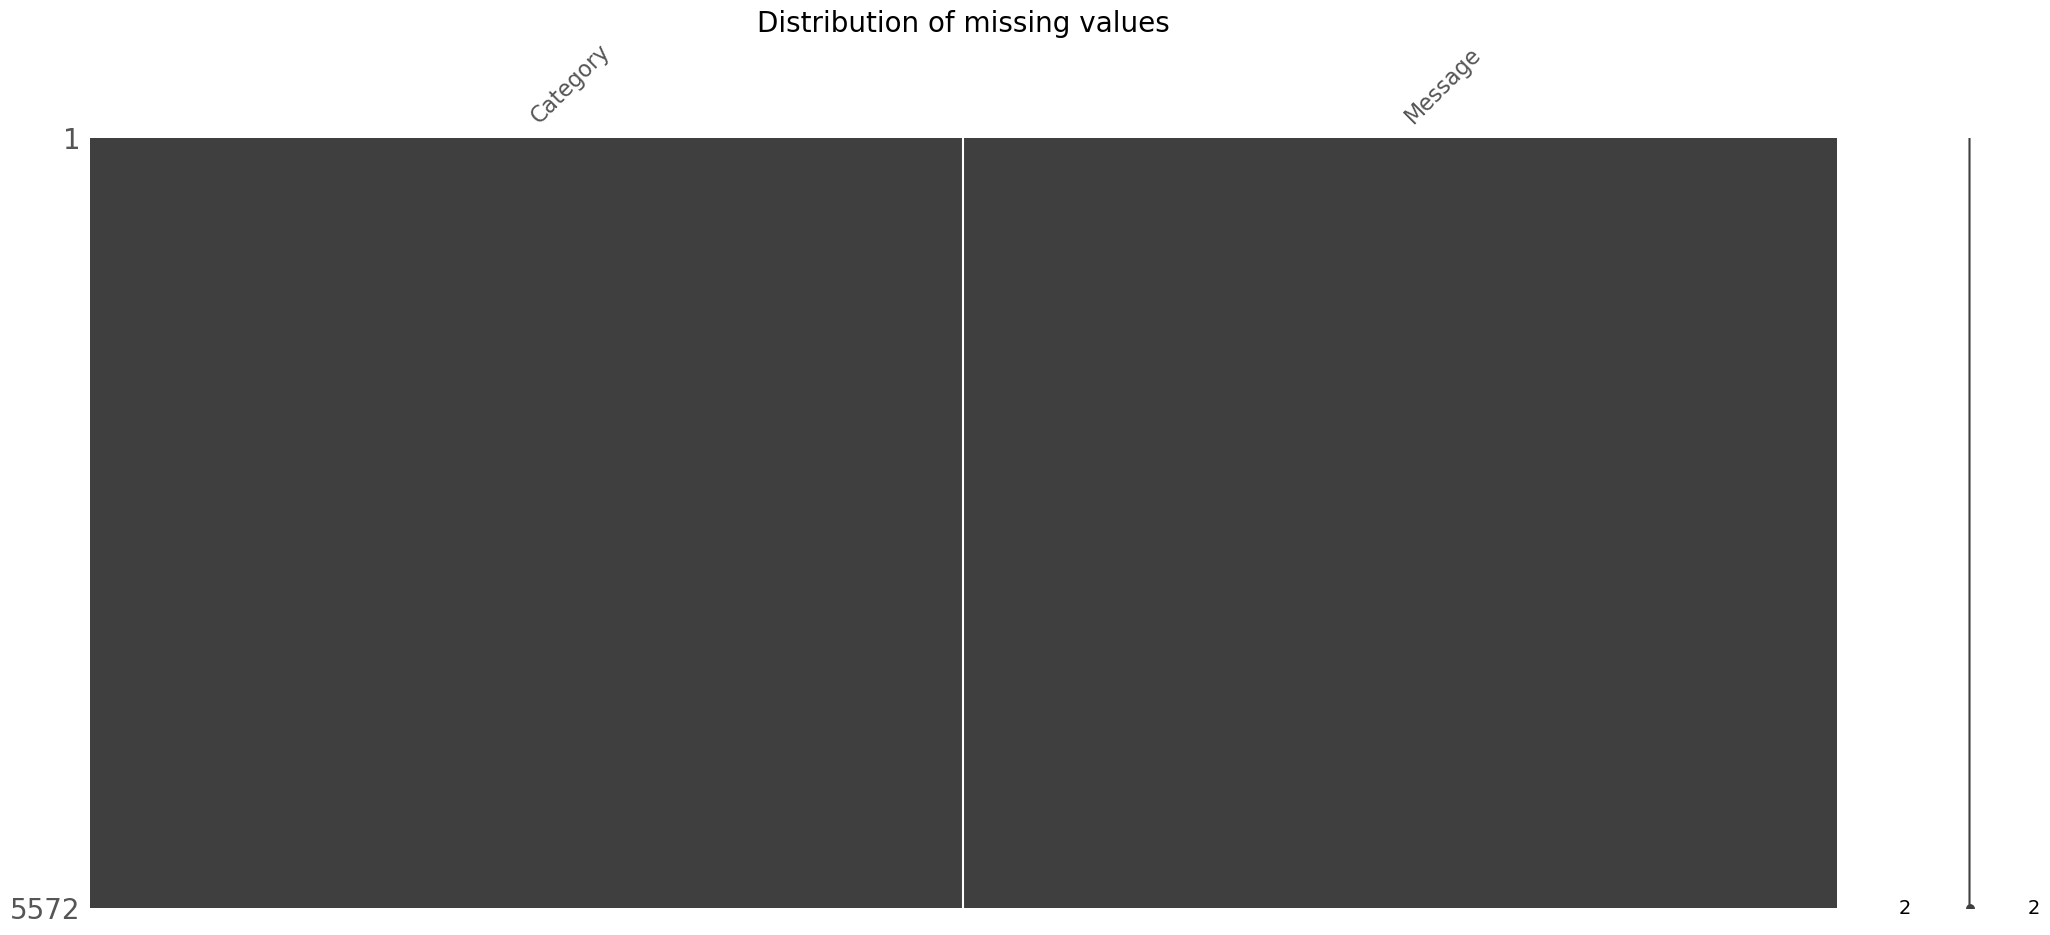

In [5]:
# Making a visual for missing values
msno.matrix(df).set_title('Distribution of missing values',fontsize=20) # checking for missing values
print('No missing Value')

In [6]:
# Checking for duplicated values
df.duplicated().sum()

415

In [7]:
df = df.drop_duplicates()

### **2.EDA on features**

## Two parts in 'EDA on each categories' section, each are:
1. Explore Distribution of each categories

2.  Explore ham & spam message length distribution

### **2.1. Distribution of each category**

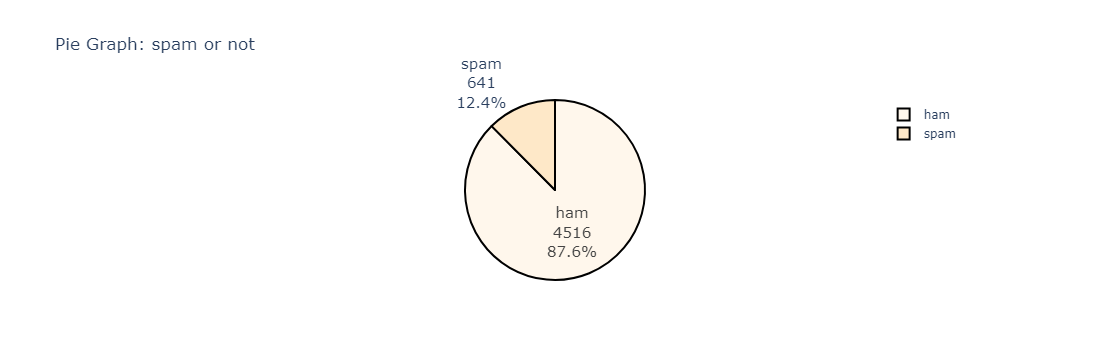

In [8]:
category_ct = df['Category'].value_counts()

fig = px.pie(values=category_ct.values,
             names=category_ct.index,
             color_discrete_sequence=px.colors.sequential.OrRd,
             title= 'Pie Graph: spam or not')
fig.update_traces(hoverinfo='label+percent', textinfo='label+value+percent', textfont_size=15,
                  marker=dict(line=dict(color='#000000', width=2)))
fig.show()

### **2.2. Length distribution of spam & ham meesage**

DataFrame info:
<class 'pandas.core.frame.DataFrame'>
Index: 5157 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5157 non-null   object
 1   Message   5157 non-null   object
dtypes: object(2)
memory usage: 120.9+ KB
None
Checking for missing or non-string values in 'Message':
Message
<class 'str'>    5157
Name: count, dtype: int64
Ham DataFrame:
  Category                                            Message  length
0      ham  Go until jurong point, crazy.. Available only ...     111
1      ham                      Ok lar... Joking wif u oni...      29
3      ham  U dun say so early hor... U c already then say...      49
4      ham  Nah I don't think he goes to usf, he lives aro...      61
6      ham  Even my brother is not like to speak with me. ...      77
Spam DataFrame:
   Category                                            Message  length
2      spam  Free entry in 2 a wkly comp to win FA

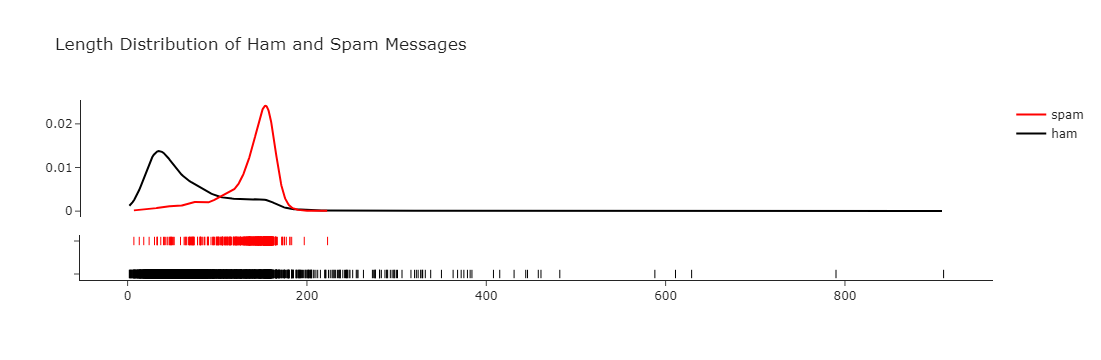

In [9]:

# Display basic info about the DataFrame
print("DataFrame info:")
print(df.info())

# Check for missing values and types in 'text' column
print("Checking for missing or non-string values in 'Message':")
print(df['Message'].apply(type).value_counts())  # Counts of different data types in 'text'

# Replace non-string values with empty string or NaN
df['Message'] = df['Message'].astype(str)

# Compute the length of each message
df['length'] = df['Message'].apply(len)

# Separate ham and spam messages
ham = df[df['Category'].str.strip().str.lower() == 'ham']
spam = df[df['Category'].str.strip().str.lower() == 'spam']

# Print data to confirm
print("Ham DataFrame:")
print(ham.head())
print("Spam DataFrame:")
print(spam.head())

# Check lengths of the messages
print("Ham Lengths:")
print(ham['length'].describe())
print("Spam Lengths:")
print(spam['length'].describe())

# Data for distribution plot
if not ham.empty and not spam.empty:
    hist_data = [ham['length'].tolist(), spam['length'].tolist()]
    group_labels = ['ham', 'spam']
    colors = ['black', 'red']

    # Create distribution plot
    fig = ff.create_distplot(hist_data, group_labels, show_hist=False, colors=colors)

    # Add title
    fig.update_layout(title_text='Length Distribution of Ham and Spam Messages',
                      template='simple_white')

    # Show plot
    fig.show()
else:
    print("No data available for plotting.")


Spam messages are mainly distributed right on 100 while Ham messages are distributed left on the length of 100.
Thus, we can conclude as spam message tends to have more letters than hpam message.

#### Rank of Ham Terms

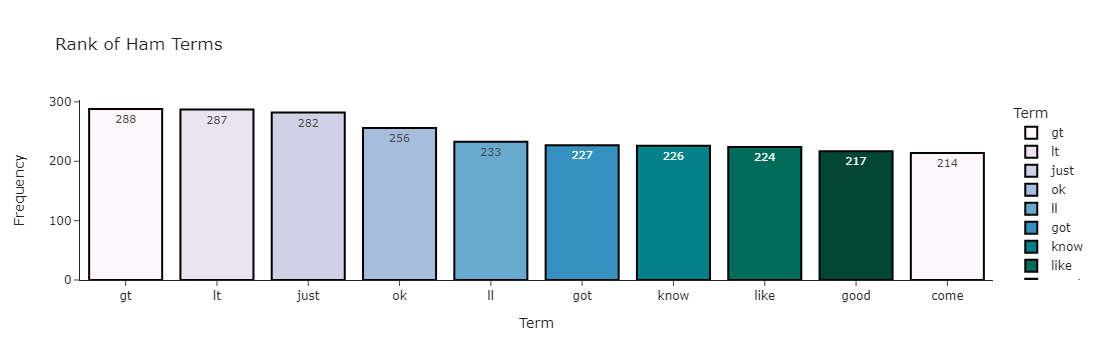

In [10]:

# Separate ham messages
ham = df[df['Category'].str.strip().str.lower() == 'ham']

# Tokenize and count terms
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(ham['Message'])
term_freq = X.sum(axis=0).A1
terms = vectorizer.get_feature_names_out()

# Create a DataFrame with term frequencies
freq_df = pd.DataFrame({'Term': terms, 'Frequency': term_freq})
freq_df = freq_df.sort_values(by='Frequency', ascending=False)

# Select the top 10 terms
top_10 = freq_df.head(10)

# Plot using Plotly Express
fig = px.bar(top_10, x='Term', y='Frequency', text='Frequency', color='Term',
             color_discrete_sequence=px.colors.sequential.PuBuGn,
             title='Rank of Ham Terms',
             template="simple_white")

# Customize plot
for idx in range(len(top_10)):
    fig.data[idx].marker.line.width = 2
    fig.data[idx].marker.line.color = "black"

fig.update_traces(textposition='inside',
                  textfont_size=11)

# Show plot
fig.show()


#### World Cloud of Ham Messages

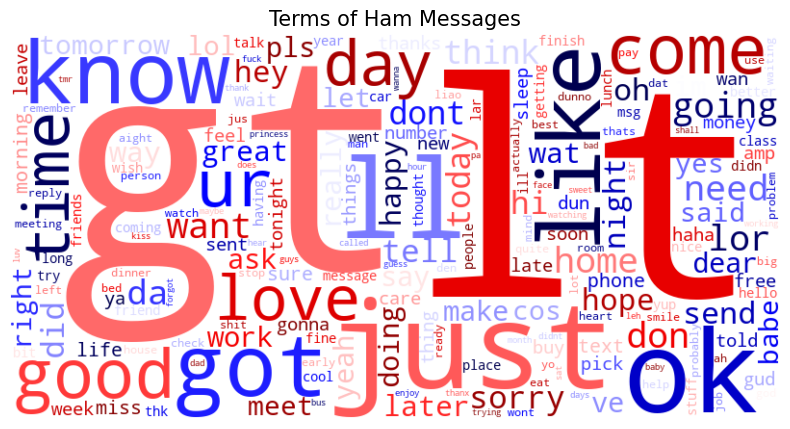

In [11]:

# Separate ham messages
ham = df[df['Category'].str.strip().str.lower() == 'ham']

# Tokenize and count terms
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(ham['Message'])
term_freq = X.sum(axis=0).A1
terms = vectorizer.get_feature_names_out()

# Create a DataFrame with term frequencies
freq_df = pd.DataFrame({'Term': terms, 'Frequency': term_freq})
freq_df = freq_df.sort_values(by='Frequency', ascending=False)

# Prepare data for WordCloud
data = dict(zip(freq_df['Term'], freq_df['Frequency']))

# Create and display the Word Cloud
wordcloud = WordCloud(width=800, height=400,
                      background_color='white',
                      colormap='seismic',
                      contour_color='black',
                      contour_width=1).generate_from_frequencies(data)

# Plot the Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Terms of Ham Messages', fontsize=15)
plt.show()


#### Bar chart of Spam Messages

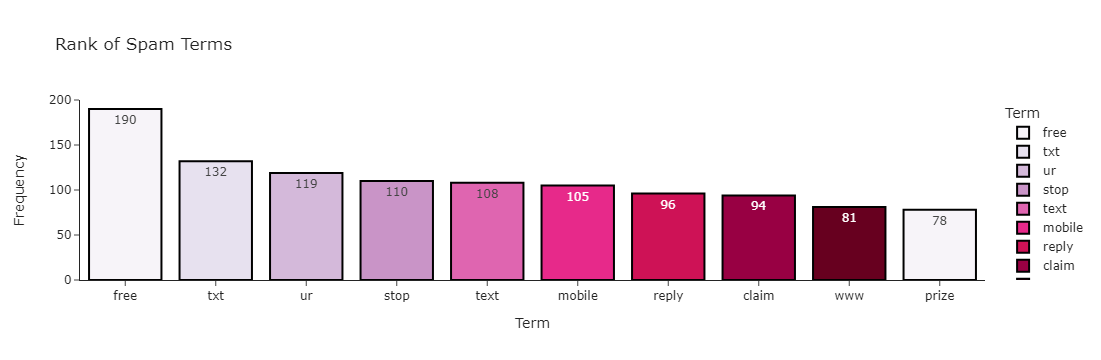

In [12]:

# Separate spam messages
spam = df[df['Category'].str.strip().str.lower() == 'spam']

# Tokenize and count terms
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(spam['Message'])
term_freq = X.sum(axis=0).A1
terms = vectorizer.get_feature_names_out()

# Create a DataFrame with term frequencies
freq_df = pd.DataFrame({'Term': terms, 'Frequency': term_freq})
freq_df = freq_df.sort_values(by='Frequency', ascending=False)

# Get the top 10 terms
top_10 = freq_df.head(10)

# Plot using plotly.express
fig = px.bar(top_10, x='Term', y='Frequency', text='Frequency',
             color='Term',
             color_discrete_sequence=px.colors.sequential.PuRd,
             title='Rank of Spam Terms',
             template='simple_white')

# Add black outline to bars
for idx in range(len(top_10)):
    fig.data[idx].marker.line.width = 2
    fig.data[idx].marker.line.color = "black"

fig.show()


#### WordCloud of Spam Messages

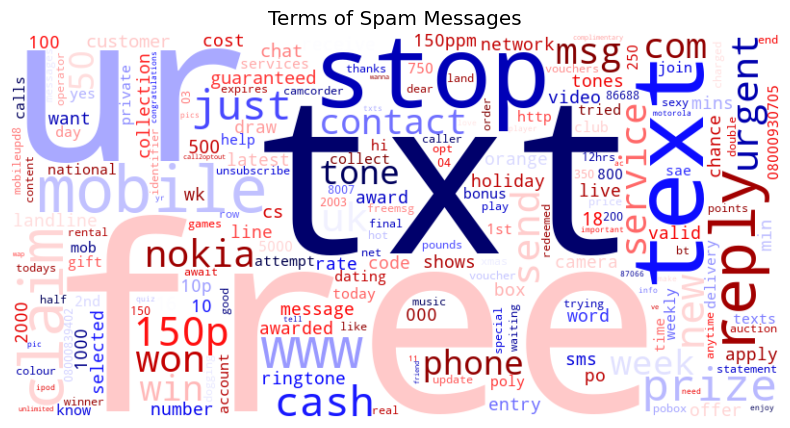

In [13]:
# Separate spam messages
spam = df[df['Category'].str.strip().str.lower() == 'spam']

# Tokenize and count terms
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(spam['Message'])
term_freq = X.sum(axis=0).A1
terms = vectorizer.get_feature_names_out()

# Create a DataFrame with term frequencies
freq_df = pd.DataFrame({'Term': terms, 'Frequency': term_freq})
freq_df = freq_df.sort_values(by='Frequency', ascending=False)

# Convert to dictionary for word cloud
data = dict(zip(freq_df['Term'], freq_df['Frequency']))

# Generate word cloud
spam_wordcloud = WordCloud(background_color='white',
                          colormap='seismic',
                          width=800,
                          height=400,
                          max_words=200).generate_from_frequencies(data)

# Plot word cloud
plt.figure(figsize=(10, 5))
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Terms of Spam Messages')
plt.show()


In [14]:
dataset_info = {
    "Number of Rows": len(df),
    "Number of Columns": df.shape[1],
    "Missing Values": df.isnull().sum(),
    "Spam Distribution": df['Category'].value_counts(normalize=True) * 100
}

dataset_info

{'Number of Rows': 5157,
 'Number of Columns': 3,
 'Missing Values': Category    0
 Message     0
 length      0
 dtype: int64,
 'Spam Distribution': Category
 ham     87.570293
 spam    12.429707
 Name: proportion, dtype: float64}

# **4. Text preprocessing for spam email detection**

### **Preprocess dataframe for classification in the next section**

function to get words from sentence, and lemmatize it with removing stopwords.

In [15]:
def preprocess(sentence):
    words = get_word(sentence)
    words_ltz = lemmatization(words)
    removed = remove_stopword('1',words_ltz)
    return removed

and also replace 'ham' value into 1, 'spam' value into 0.

In [16]:
df.head()

Category                                            Message  length
0      ham  Go until jurong point, crazy.. Available only ...     111
1      ham                      Ok lar... Joking wif u oni...      29
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...     155
3      ham  U dun say so early hor... U c already then say...      49
4      ham  Nah I don't think he goes to usf, he lives aro...      61

In [17]:
# Preprocessing
texts = df['Message'].values
labels = df['Category'].values

In [18]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Assuming your dataset has the features in 'X' and labels in 'y'
texts = df['Message']  # Features (you may need to vectorize text data first)
labels = df['Category']  # Target

# Convert X into a numerical format (like using TF-IDF or CountVectorizer)
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
texts = vectorizer.fit_transform(texts)

# Apply random undersampling
rus = RandomUnderSampler(random_state=42)
texts_u, labels_u = rus.fit_resample(texts, labels)


In [22]:
# Import the LabelEncoder class
from sklearn.preprocessing import LabelEncoder

# Encode labels
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

## **Data Processing using Sequence Based Method**

In [93]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import ClusterCentroids
from imblearn.under_sampling import NearMiss
from imblearn.under_sampling import EditedNearestNeighbours

# Preprocessing
texts = df['Message'].values
labels = df['Category'].values

# Convert texts into numerical format using CountVectorizer
vectorizer = CountVectorizer()
texts_vectorized = vectorizer.fit_transform(texts)


'''
# Apply random undersampling
rus = RandomUnderSampler(random_state=42)
texts_resampled, labels_resampled = rus.fit_resample(texts_vectorized, labels)
'''

'''
# Apply Tomek Links undersampling
tomek = TomekLinks()
texts_resampled, labels_resampled = tomek.fit_resample(texts_vectorized, labels)
'''

'''
# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
texts_resampled, labels_resampled = smote.fit_resample(texts_vectorized, labels)
'''
'''
# Apply Cluster Centroids undersampling
cc = ClusterCentroids(random_state=42)
texts_resampled, labels_resampled = cc.fit_resample(texts_vectorized, labels)
'''

'''
# Apply Edited Nearest Neighbors undersampling
enn = EditedNearestNeighbours()
texts_resampled, labels_resampled = enn.fit_resample(texts_vectorized, labels)
'''

# Apply NearMiss undersampling (you can change the version, e.g., version=2)
near_miss = NearMiss(version=1)
texts_resampled, labels_resampled = near_miss.fit_resample(texts_vectorized, labels)


# Encode labels
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels_resampled)

# Convert sparse matrix to dense format before train-test split
texts_resampled_dense = texts_resampled.toarray()

# Split the dataset (use the resampled texts and labels)
X_train, X_test, y_train, y_test = train_test_split(
    texts_resampled_dense, labels_encoded, test_size=0.2, random_state=42
)

# Tokenization and Padding
max_words = 5000  # Limit the number of words in the tokenizer
max_len = 150  # Max length of sequences

# Convert X_train and X_test from arrays to lists of strings
X_train_list = [str(item) for item in X_train.tolist()]
X_test_list = [str(item) for item in X_test.tolist()]

# Tokenizer for training data
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train_list)  # Fit tokenizer on training data

# Convert texts to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train_list)
X_test_seq = tokenizer.texts_to_sequences(X_test_list)

# Padding the sequences to ensure uniform input size
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)


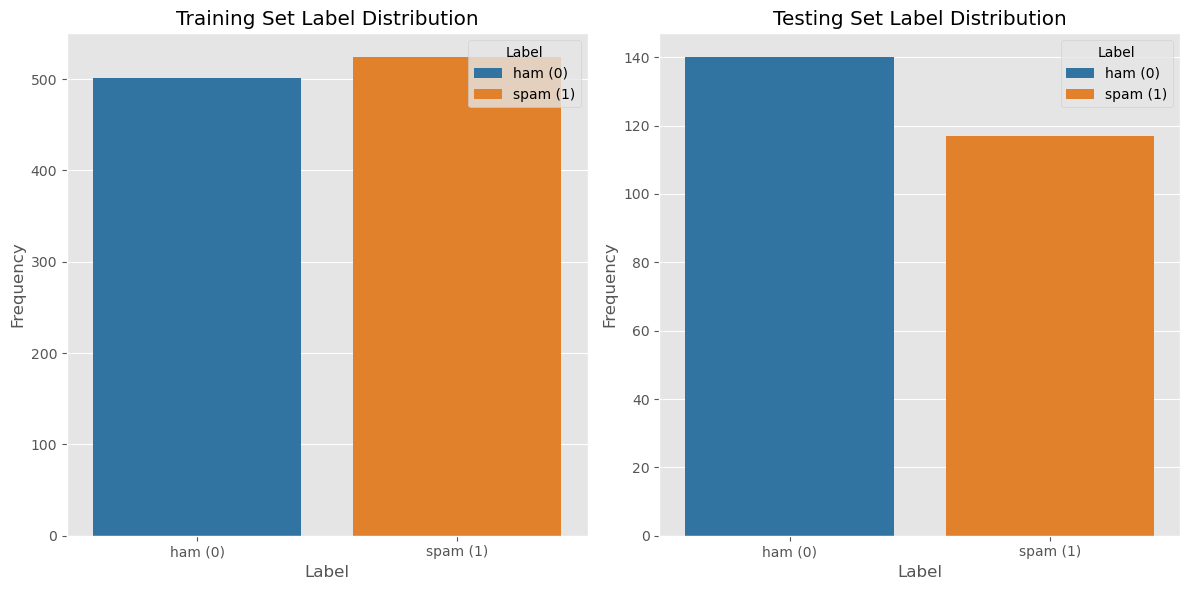

In [94]:
# Create a DataFrame for easy plotting
data = pd.DataFrame({
    'Set': ['Training'] * len(y_train) + ['Testing'] * len(y_test),
    'Label': list(y_train) + list(y_test)
})
# Define colors
color_map = {0: '#1f77b4', 1: '#ff7f0e'}  # Map colors to label
# Plot histograms
plt.figure(figsize=(12, 6))

# Training Set Histogram
plt.subplot(1, 2, 1)
sns.countplot(x='Label', data=data[data['Set'] == 'Training'], hue='Label', palette=color_map)
plt.title('Training Set Label Distribution')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.xticks(ticks=[0, 1], labels=['ham (0)', 'spam (1)'])
plt.legend(title='Label', labels=['ham (0)', 'spam (1)'], loc='upper right')

# Testing Set Histogram
plt.subplot(1, 2, 2)
sns.countplot(x='Label', data=data[data['Set'] == 'Testing'], hue='Label', palette=color_map)
plt.title('Testing Set Label Distribution')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.xticks(ticks=[0, 1], labels=['ham (0)', 'spam (1)'])
plt.legend(title='Label', labels=['ham (0)', 'spam (1)'], loc='upper right')

plt.tight_layout()
plt.show()


In [95]:
import pydot
import graphviz

In [96]:
import os
os.environ["PATH"] += os.pathsep + r"C:\Program Files\Graphviz\bin"


In [97]:
import pydot

try:
    # Attempt to create a simple dot graph
    graph = pydot.graph_from_dot_data("digraph G {A -> B;}")[0]
    graph.write_png("test_graph.png")  # Try to write to a PNG file
    print("Graphviz is working correctly.")
except Exception as e:
    print("Error:", e)


Graphviz is working correctly.


## **Advance Individual Model**

##### CNN Model

Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_30 (Embedding)             │ (None, 5000, 128)           │         640,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_12 (Conv1D)                   │ (None, 4996, 64)            │          41,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_12 (MaxPooling1D)      │ (None, 1249, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_30 (Dropout)                 │ (None, 1249, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_8 (Flatten)                  │ (None, 79936)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_60 (Dense)                     │ (None, 10)                  │         799,370 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_61 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,480,405 (5.65 MB)

 Trainable params: 1,480,405 (5.65 MB)

 Non-trainable params: 0 (0.00 B)

None


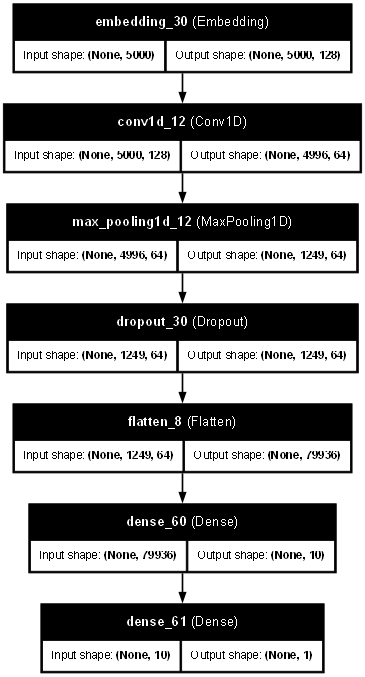

In [98]:
import pydot

# Parameters for the model
max_words = 5000  # Adjust this based on your vocabulary size

# Define the CNN model
def create_cnn_model():
    model = Sequential()
    model.add(Embedding(input_dim=max_words, output_dim=128))  # Removed input_length
    model.add(Conv1D(filters=64, kernel_size=5, activation='relu'))
    model.add(MaxPooling1D(pool_size=4))
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create the CNN model instance
model_cnn = create_cnn_model()

# Build the model by specifying the input shape
model_cnn.build(input_shape=(None, max_words))

# Print the model summary
print(model_cnn.summary())

# Show the model architecture with a smaller size
tf.keras.utils.plot_model(
    model_cnn,
    show_shapes=True,
    show_layer_names=True,
    dpi=60  # Adjust DPI for smaller image size
)


##### RNN Model

Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_31 (Embedding)             │ (None, 5000, 128)           │         640,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_12 (SimpleRNN)            │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_31 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_62 (Dense)                     │ (None, 10)                  │           1,290 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_63 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 674,197 (2.57 MB)

 Trainable params: 674,197 (2.57 MB)

 Non-trainable params: 0 (0.00 B)

None


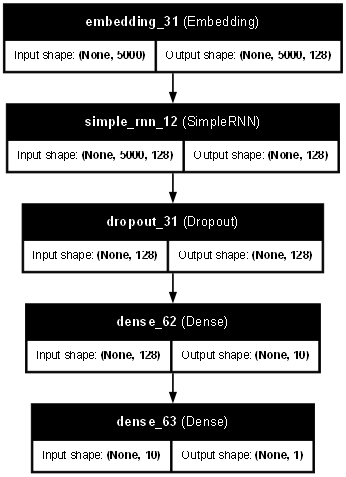

In [99]:
# Parameters for the model
max_words = 5000  # Adjust this based on your vocabulary size

# Define the RNN model
def create_rnn_model():
    model = Sequential()
    model.add(Embedding(input_dim=max_words, output_dim=128))  # Removed input_length
    model.add(SimpleRNN(128, return_sequences=False))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create the RNN model instance
model_rnn = create_rnn_model()

# Build the model by specifying the input shape
model_rnn.build(input_shape=(None, max_words))

# Print the model summary
print(model_rnn.summary())

# Show the model architecture with a smaller size
tf.keras.utils.plot_model(
    model_rnn,          # Corrected variable name
    show_shapes=True,
    show_layer_names=True,
    dpi=60  # Adjust DPI for smaller image size
)


##### LSTM Model

Model: "sequential_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_32 (Embedding)             │ (None, 5000, 128)           │         640,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_12 (LSTM)                       │ (None, 128)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_32 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_64 (Dense)                     │ (None, 10)                  │           1,290 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_65 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 772,885 (2.95 MB)

 Trainable params: 772,885 (2.95 MB)

 Non-trainable params: 0 (0.00 B)

None


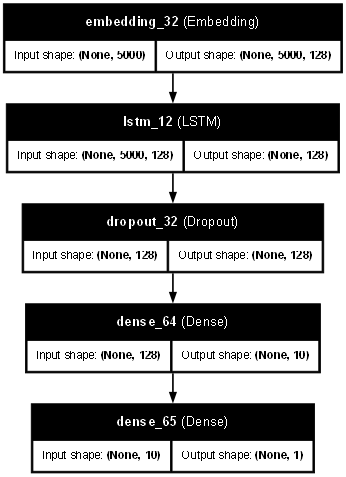

In [100]:
# Import necessary libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dropout, Dense
import tensorflow as tf

# Parameters for the model
max_words = 5000  # Adjust this based on your vocabulary size

# Define the LSTM model
def create_lstm_model():
    model = Sequential()
    model.add(Embedding(input_dim=max_words, output_dim=128))  # Removed input_length
    model.add(LSTM(128, return_sequences=False))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create the LSTM model instance
model_lstm = create_lstm_model()

# Build the model by specifying the input shape
model_lstm.build(input_shape=(None, max_words))

# Print the model summary
print(model_lstm.summary())

# Show the model architecture with a smaller size
tf.keras.utils.plot_model(
    model_lstm,
    show_shapes=True,
    show_layer_names=True,
    dpi=60  # Adjust DPI for smaller image size
)


### **Evaluation of Individual Model**

Training CNN model...
Epoch 1/50
26/26 - 2s - 92ms/step - accuracy: 0.5159 - loss: 0.6920 - val_accuracy: 0.5366 - val_loss: 0.6788
Epoch 2/50
26/26 - 0s - 17ms/step - accuracy: 0.6232 - loss: 0.6571 - val_accuracy: 0.7024 - val_loss: 0.6138
Epoch 3/50
26/26 - 0s - 18ms/step - accuracy: 0.7341 - loss: 0.5810 - val_accuracy: 0.7610 - val_loss: 0.5323
Epoch 4/50
26/26 - 0s - 17ms/step - accuracy: 0.7439 - loss: 0.5483 - val_accuracy: 0.7610 - val_loss: 0.5367
Epoch 5/50
26/26 - 0s - 16ms/step - accuracy: 0.7500 - loss: 0.5324 - val_accuracy: 0.7610 - val_loss: 0.5105
Epoch 6/50
26/26 - 0s - 16ms/step - accuracy: 0.7537 - loss: 0.5196 - val_accuracy: 0.7610 - val_loss: 0.5047
Epoch 7/50
26/26 - 0s - 16ms/step - accuracy: 0.7524 - loss: 0.5030 - val_accuracy: 0.7610 - val_loss: 0.5035
Epoch 8/50
26/26 - 0s - 16ms/step - accuracy: 0.7573 - loss: 0.5097 - val_accuracy: 0.7610 - val_loss: 0.5055
Epoch 9/50
26/26 - 0s - 17ms/step - accuracy: 0.7500 - loss: 0.4979 - val_accuracy: 0.7610 - val_l

<Figure size 600x400 with 0 Axes>

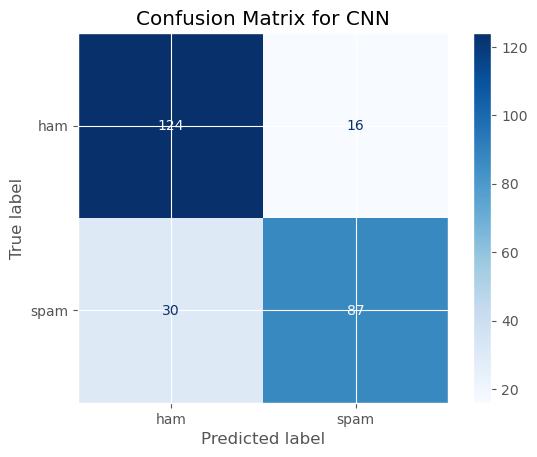

CNN model metrics:
Accuracy: 0.8210
Precision: 0.8232
Recall: 0.8210
F1 Score: 0.8196

Classification Report for CNN:
               precision    recall  f1-score   support

         ham       0.81      0.89      0.84       140
        spam       0.84      0.74      0.79       117

    accuracy                           0.82       257
   macro avg       0.82      0.81      0.82       257
weighted avg       0.82      0.82      0.82       257

Training RNN model...
Epoch 1/50
26/26 - 4s - 173ms/step - accuracy: 0.5439 - loss: 0.6882 - val_accuracy: 0.5171 - val_loss: 0.6613
Epoch 2/50
26/26 - 1s - 31ms/step - accuracy: 0.4939 - loss: 0.7077 - val_accuracy: 0.6976 - val_loss: 0.6877
Epoch 3/50
26/26 - 1s - 29ms/step - accuracy: 0.4963 - loss: 0.7005 - val_accuracy: 0.4634 - val_loss: 0.6936
Epoch 4/50
26/26 - 1s - 29ms/step - accuracy: 0.4988 - loss: 0.6979 - val_accuracy: 0.4634 - val_loss: 0.6936
Epoch 5/50
26/26 - 1s - 29ms/step - accuracy: 0.4878 - loss: 0.6939 - val_accuracy: 0.4634 

<Figure size 600x400 with 0 Axes>

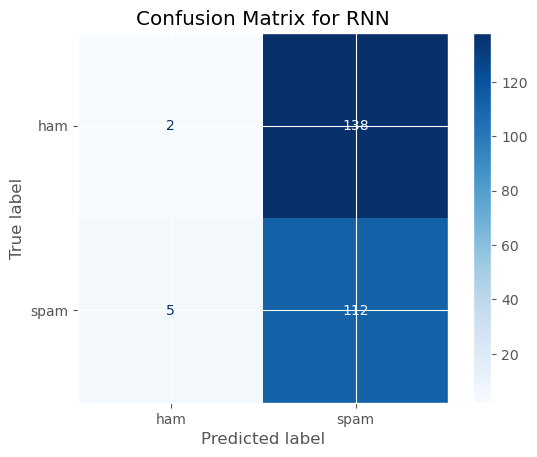

RNN model metrics:
Accuracy: 0.4436
Precision: 0.3596
Recall: 0.4436
F1 Score: 0.2927

Classification Report for RNN:
               precision    recall  f1-score   support

         ham       0.29      0.01      0.03       140
        spam       0.45      0.96      0.61       117

    accuracy                           0.44       257
   macro avg       0.37      0.49      0.32       257
weighted avg       0.36      0.44      0.29       257

Training LSTM model...
Epoch 1/50
26/26 - 6s - 215ms/step - accuracy: 0.5061 - loss: 0.6949 - val_accuracy: 0.4634 - val_loss: 0.6940
Epoch 2/50
26/26 - 2s - 95ms/step - accuracy: 0.5037 - loss: 0.6940 - val_accuracy: 0.4634 - val_loss: 0.6946
Epoch 3/50
26/26 - 2s - 95ms/step - accuracy: 0.4829 - loss: 0.6939 - val_accuracy: 0.4683 - val_loss: 0.6932
Epoch 4/50
26/26 - 2s - 95ms/step - accuracy: 0.4902 - loss: 0.6931 - val_accuracy: 0.5366 - val_loss: 0.6931
Epoch 5/50
26/26 - 3s - 98ms/step - accuracy: 0.4866 - loss: 0.6934 - val_accuracy: 0.4634

<Figure size 600x400 with 0 Axes>

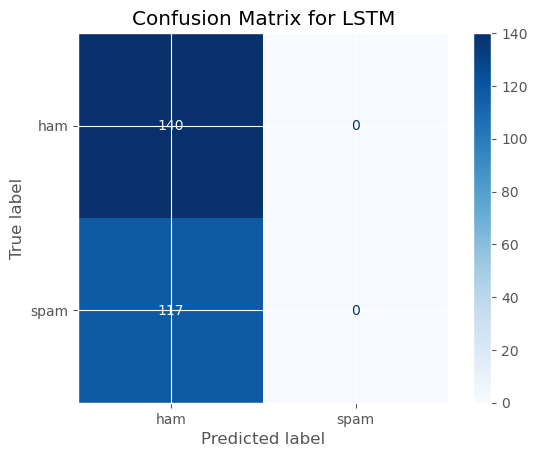

LSTM model metrics:
Accuracy: 0.5447
Precision: 0.7520
Recall: 0.5447
F1 Score: 0.3842

Classification Report for LSTM:
               precision    recall  f1-score   support

         ham       0.54      1.00      0.71       140
        spam       0.00      0.00      0.00       117

    accuracy                           0.54       257
   macro avg       0.27      0.50      0.35       257
weighted avg       0.30      0.54      0.38       257



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [103]:
# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.callbacks import EarlyStopping

# Define combined models (ensure model creation functions are implemented)
combined_models_1 = {
    'CNN': create_cnn_model(),
    'RNN': create_rnn_model(),
    'LSTM': create_lstm_model()
}

class_labels = ['ham', 'spam']

# Dictionary to store metrics and history of each model
metric_combine = {}
history_combine = {}

# Initialize a dictionary to store classification reports and confusion matrices
reports = {}

# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

for name, model in combined_models_1.items():
    print(f"Training {name} model...")

    # Train the model with EarlyStopping callback and save the training history
    history = model.fit(
        X_train_pad,
        y_train,
        epochs=50,
        batch_size=32,
        validation_split=0.2,
        verbose=2,
        callbacks=[early_stopping]  # Add the callback here
    )
    history_combine[name] = history.history  # Save history

    # Evaluate the model on test data
    y_pred = (model.predict(X_test_pad) > 0.5).astype("int32").flatten()

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)


    metric_combine[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

    # Generate the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix
    plt.figure(figsize=(6, 4))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for {name}')
    plt.show()

    # Generate classification report
    report = classification_report(y_test, y_pred, target_names=class_labels)
    reports[name] = report

    print(f"{name} model metrics:\nAccuracy: {accuracy:.4f}\nPrecision: {precision:.4f}\nRecall: {recall:.4f}\nF1 Score: {f1:.4f}\n")
    print(f"Classification Report for {name}:\n", report)


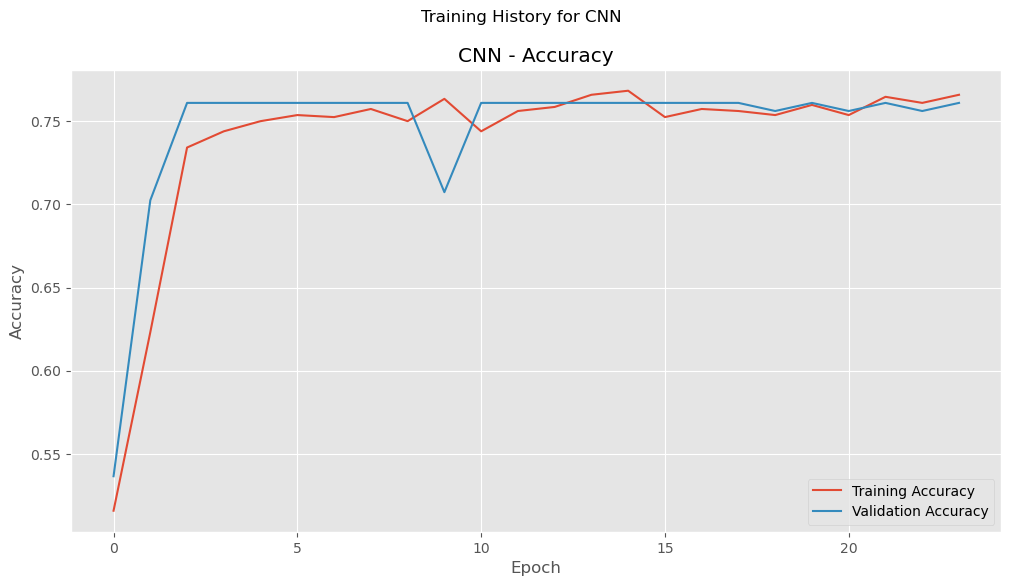

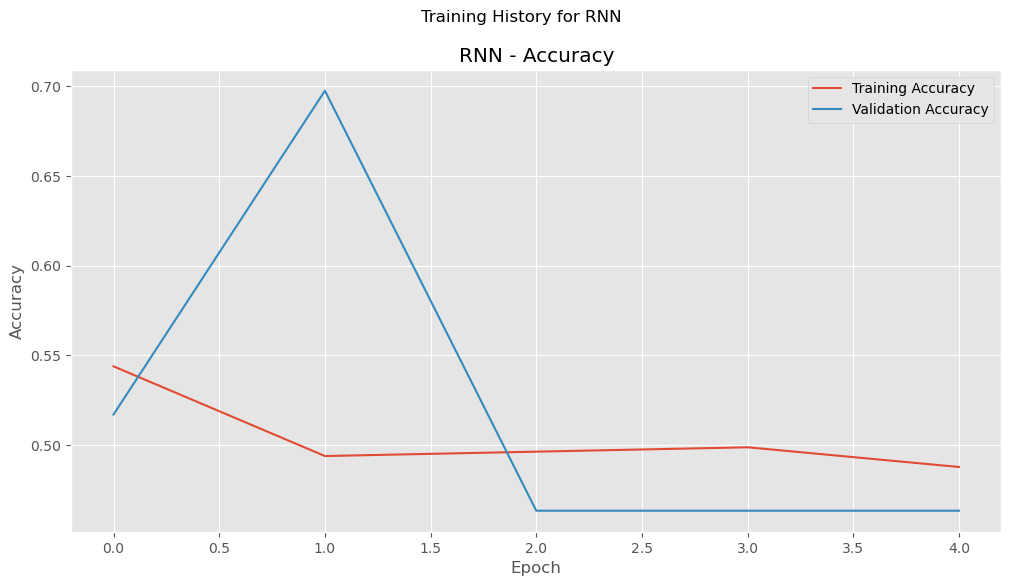

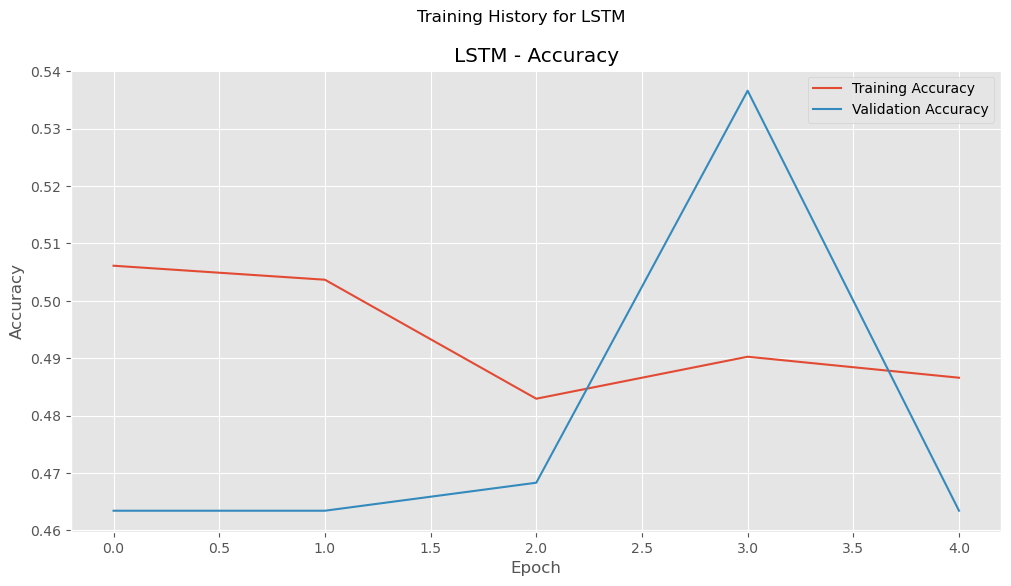

In [104]:

# Plot training history for each model
for name, history in history_combine.items():
    plt.figure(figsize=(12, 6))

    plt.plot(history['accuracy'], label='Training Accuracy')
    plt.plot(history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{name} - Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.suptitle(f'Training History for {name}')
    plt.show()

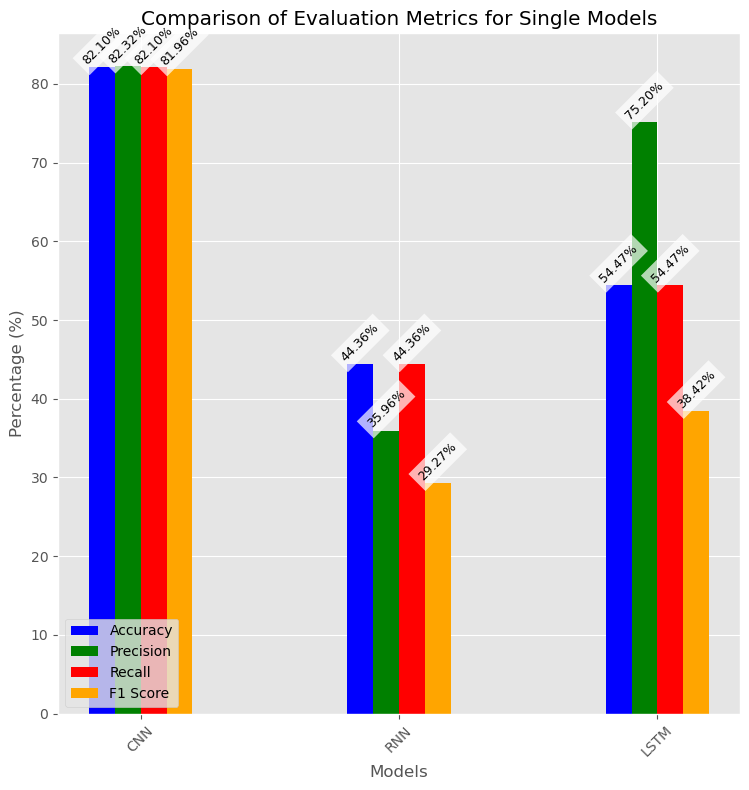

In [105]:
# Convert metrics dictionary to a DataFrame for easier plotting
metrics_df = pd.DataFrame(metric_combine).T

# Define plot size
plt.figure(figsize=(8, 8))

# Define bar width and positions
bar_width = 0.1
index = np.arange(len(metrics_df))

# Plot each metric
for i, metric in enumerate(metrics_df.columns):
    bars = plt.bar(index + i * bar_width, metrics_df[metric] * 100, bar_width,
                   label=metric, color=['blue', 'green', 'red', 'orange'][i])

    # Annotate bars with the exact percentage value
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.2f}%',
                 ha='center', va='bottom', fontsize=9, rotation=45, bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

# Adding labels and title
plt.xlabel('Models')
plt.ylabel('Percentage (%)')
plt.title('Comparison of Evaluation Metrics for Single Models')

# Adjust x-axis labels to avoid overlap
plt.xticks(index + bar_width * (len(metrics_df.columns) / 2) - bar_width / 2, metrics_df.index, rotation=45)

# Adjust plot margins to ensure everything fits
plt.tight_layout(rect=[0, 0, 0.95, 1])  # Adjust the margins

plt.legend(loc='lower left')
plt.show()

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


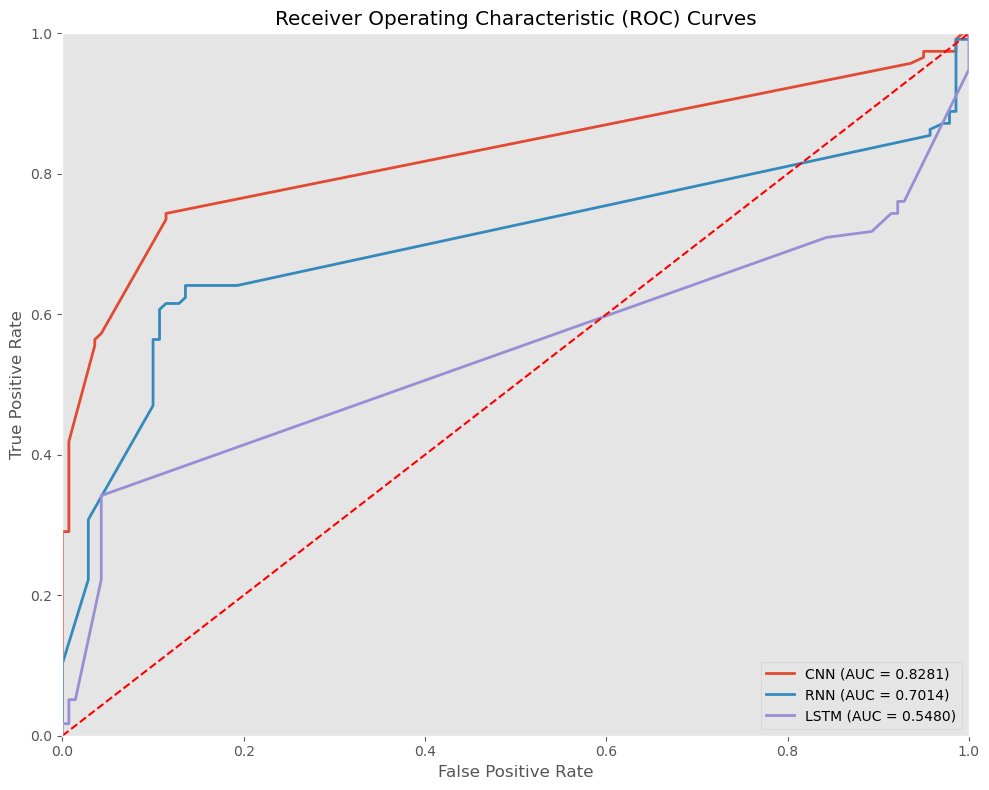

In [106]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Prepare the figure
plt.figure(figsize=(10, 8))

# Iterate over each model to compute and plot ROC curve
for model_name, model in combined_models_1.items():
    # Predict probabilities
    y_proba = model.predict(X_test_pad).flatten()

    # Calculate ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {roc_auc:.4f})')

# Plot the diagonal line (no redundant arguments)
plt.plot([0, 1], [0, 1], 'r--')

# Plot settings
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')
plt.grid(False)

# Show the plot
plt.tight_layout()
plt.show()


## **Hybrid Models Considered**

### **CNN-RNN Model**

Model: "functional_42"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_42 (InputLayer)          │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding_42 (Embedding)             │ (None, 100, 128)            │         640,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_16 (Conv1D)                   │ (None, 96, 64)              │          41,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_16 (MaxPooling1D)      │ (None, 24, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_16 (SimpleRNN)            │ (None, 128)                 │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_42 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_84 (Dense)                     │ (None, 10)                  │           1,290 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_85 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 707,029 (2.70 MB)

 Trainable params: 707,029 (2.70 MB)

 Non-trainable params: 0 (0.00 B)

None


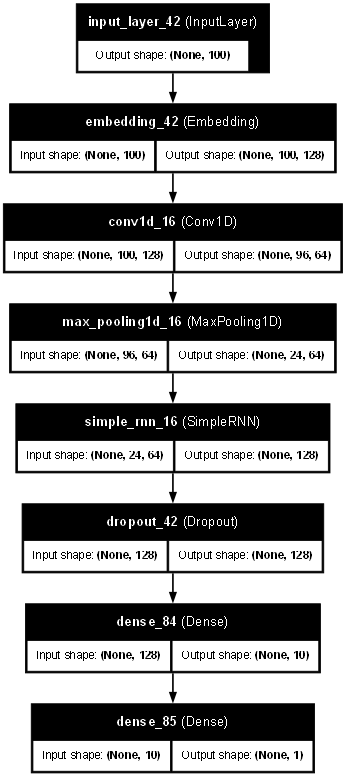

In [107]:
# Import necessary libraries
from tensorflow.keras.layers import Input, Embedding, Conv1D, MaxPooling1D, SimpleRNN, Dropout, Dense
from tensorflow.keras.models import Model
import tensorflow as tf

# Parameters for the model
max_words = 5000  # Adjust this based on your vocabulary size
max_len = 100     # Adjust this based on the length of your input sequences

# Define the CNN-RNN model
def create_cnn_rnn_model():
    input_layer = Input(shape=(max_len,))
    x = Embedding(input_dim=max_words, output_dim=128)(input_layer)
    x = Conv1D(filters=64, kernel_size=5, activation='relu')(x)
    x = MaxPooling1D(pool_size=4)(x)
    x = SimpleRNN(128, return_sequences=False)(x)
    x = Dropout(0.5)(x)
    x = Dense(10, activation='relu')(x)
    output_layer = Dense(1, activation='sigmoid')(x)
    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create the CNN-RNN model instance
model_cnn_rnn = create_cnn_rnn_model()

# Print the model summary
print(model_cnn_rnn.summary())

# Show the model architecture
tf.keras.utils.plot_model(
    model_cnn_rnn,
    show_shapes=True,
    show_layer_names=True,
    dpi=60  # Adjust DPI for smaller image size
)


### **CNN-LSTM model**

Model: "functional_43"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_43 (InputLayer)          │ (None, 150)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding_43 (Embedding)             │ (None, 150, 128)            │         640,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_17 (Conv1D)                   │ (None, 146, 64)             │          41,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_17 (MaxPooling1D)      │ (None, 36, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_16 (LSTM)                       │ (None, 128)                 │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_43 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_86 (Dense)                     │ (None, 10)                  │           1,290 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_87 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 781,141 (2.98 MB)

 Trainable params: 781,141 (2.98 MB)

 Non-trainable params: 0 (0.00 B)

None


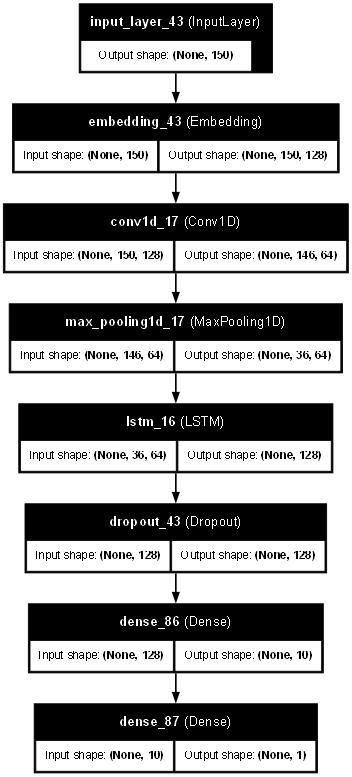

In [108]:
# Import necessary libraries
from tensorflow.keras.layers import Input, Embedding, Conv1D, MaxPooling1D, LSTM, Dropout, Dense
from tensorflow.keras.models import Model
import tensorflow as tf

# Parameters for the model
max_words = 5000  # Adjust this based on your vocabulary size
max_len = 150     # Adjust this based on the length of your input sequences

# Define the CNN-LSTM model
def create_cnn_lstm_model():
    input_layer = Input(shape=(max_len,))
    x = Embedding(input_dim=max_words, output_dim=128)(input_layer)
    x = Conv1D(filters=64, kernel_size=5, activation='relu')(x)
    x = MaxPooling1D(pool_size=4)(x)
    x = LSTM(128, return_sequences=False)(x)
    x = Dropout(0.5)(x)
    x = Dense(10, activation='relu')(x)
    output_layer = Dense(1, activation='sigmoid')(x)
    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create the CNN-LSTM model instance
model_cnn_lstm = create_cnn_lstm_model()

# Print the model summary
print(model_cnn_lstm.summary())

# Show the model architecture
tf.keras.utils.plot_model(
    model_cnn_lstm,
    show_shapes=True,
    show_layer_names=True,
    dpi=60  # Adjust DPI for smaller image size
)


## **RNN-LSTM Model**

Model: "functional_44"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_44 (InputLayer)          │ (None, 150)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding_44 (Embedding)             │ (None, 150, 128)            │         640,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_17 (SimpleRNN)            │ (None, 150, 128)            │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_17 (LSTM)                       │ (None, 128)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_44 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_88 (Dense)                     │ (None, 10)                  │           1,290 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_89 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 805,781 (3.07 MB)

 Trainable params: 805,781 (3.07 MB)

 Non-trainable params: 0 (0.00 B)

None


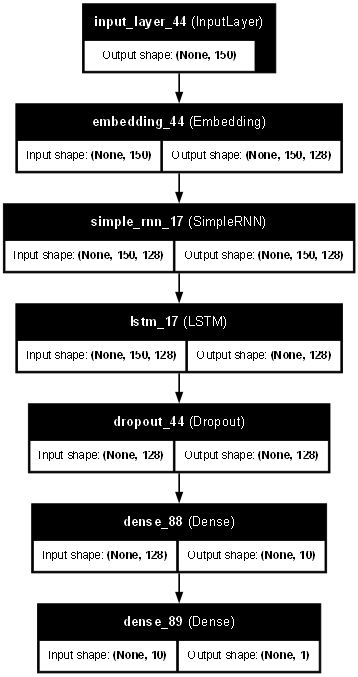

In [109]:
# Import necessary libraries
from tensorflow.keras.layers import Input, Embedding, SimpleRNN, LSTM, Dropout, Dense
from tensorflow.keras.models import Model
import tensorflow as tf

# Parameters for the model
max_words = 5000  # Adjust this based on your vocabulary size
max_len = 150     # Adjust this based on the length of your input sequences

# Define the RNN-LSTM model
def create_rnn_lstm_model():
    input_layer = Input(shape=(max_len,))
    x = Embedding(input_dim=max_words, output_dim=128)(input_layer)
    x = SimpleRNN(128, return_sequences=True)(x)
    x = LSTM(128, return_sequences=False)(x)
    x = Dropout(0.5)(x)
    x = Dense(10, activation='relu')(x)
    output_layer = Dense(1, activation='sigmoid')(x)
    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create the RNN-LSTM model instance
model_rnn_lstm = create_rnn_lstm_model()

# Print the model summary
print(model_rnn_lstm.summary())

# Show the model architecture
tf.keras.utils.plot_model(
    model_rnn_lstm,
    show_shapes=True,
    show_layer_names=True,
    dpi=60  # Adjust DPI for smaller image size
)


# **Evaluation of Each Combination**

Training CNN-RNN model...
Epoch 1/100
26/26 - 5s - 184ms/step - accuracy: 0.5037 - loss: 0.7057 - val_accuracy: 0.5366 - val_loss: 0.6778
Epoch 2/100
26/26 - 1s - 25ms/step - accuracy: 0.5768 - loss: 0.6748 - val_accuracy: 0.7463 - val_loss: 0.5830
Epoch 3/100
26/26 - 1s - 24ms/step - accuracy: 0.6524 - loss: 0.6153 - val_accuracy: 0.7415 - val_loss: 0.5827
Epoch 4/100
26/26 - 1s - 30ms/step - accuracy: 0.7256 - loss: 0.5733 - val_accuracy: 0.7512 - val_loss: 0.5676
Epoch 5/100
26/26 - 1s - 44ms/step - accuracy: 0.7207 - loss: 0.5693 - val_accuracy: 0.7659 - val_loss: 0.5357
Epoch 6/100
26/26 - 1s - 24ms/step - accuracy: 0.7280 - loss: 0.5650 - val_accuracy: 0.6829 - val_loss: 0.5657
Epoch 7/100
26/26 - 1s - 25ms/step - accuracy: 0.7171 - loss: 0.5544 - val_accuracy: 0.7561 - val_loss: 0.5302
Epoch 8/100
26/26 - 1s - 25ms/step - accuracy: 0.7463 - loss: 0.5435 - val_accuracy: 0.7610 - val_loss: 0.5252
Epoch 9/100
26/26 - 1s - 24ms/step - accuracy: 0.7390 - loss: 0.5395 - val_accuracy: 

<Figure size 600x400 with 0 Axes>

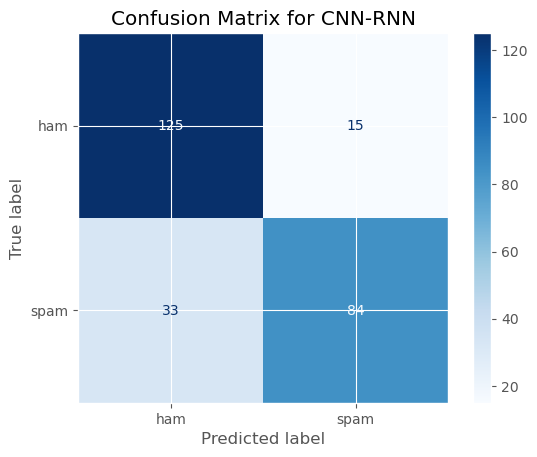

CNN-RNN model metrics:
Accuracy: 0.8132
Precision: 0.8172
Recall: 0.8132
F1 Score: 0.8111

Classification Report for CNN-RNN:
               precision    recall  f1-score   support

         ham       0.79      0.89      0.84       140
        spam       0.85      0.72      0.78       117

    accuracy                           0.81       257
   macro avg       0.82      0.81      0.81       257
weighted avg       0.82      0.81      0.81       257

Training CNN-LSTM model...
Epoch 1/100
26/26 - 5s - 196ms/step - accuracy: 0.5049 - loss: 0.6949 - val_accuracy: 0.4634 - val_loss: 0.6943
Epoch 2/100
26/26 - 1s - 36ms/step - accuracy: 0.4951 - loss: 0.6936 - val_accuracy: 0.4634 - val_loss: 0.6934
Epoch 3/100
26/26 - 1s - 50ms/step - accuracy: 0.5012 - loss: 0.6933 - val_accuracy: 0.4634 - val_loss: 0.6936
Epoch 4/100
26/26 - 1s - 51ms/step - accuracy: 0.5220 - loss: 0.6918 - val_accuracy: 0.4634 - val_loss: 0.6939
Epoch 5/100
26/26 - 1s - 50ms/step - accuracy: 0.5939 - loss: 0.6773 - val

<Figure size 600x400 with 0 Axes>

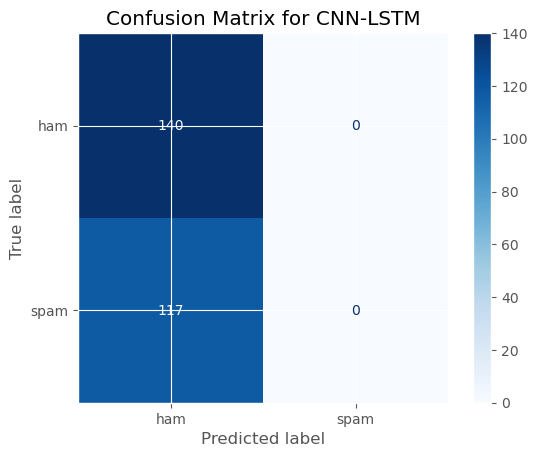

CNN-LSTM model metrics:
Accuracy: 0.5447
Precision: 0.7520
Recall: 0.5447
F1 Score: 0.3842

Classification Report for CNN-LSTM:
               precision    recall  f1-score   support

         ham       0.54      1.00      0.71       140
        spam       0.00      0.00      0.00       117

    accuracy                           0.54       257
   macro avg       0.27      0.50      0.35       257
weighted avg       0.30      0.54      0.38       257

Training RNN-LSTM model...
Epoch 1/100


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



26/26 - 8s - 312ms/step - accuracy: 0.5122 - loss: 0.7128 - val_accuracy: 0.4634 - val_loss: 0.7036
Epoch 2/100
26/26 - 4s - 139ms/step - accuracy: 0.4927 - loss: 0.7000 - val_accuracy: 0.4634 - val_loss: 0.6934
Epoch 3/100
26/26 - 4s - 140ms/step - accuracy: 0.5098 - loss: 0.6934 - val_accuracy: 0.5366 - val_loss: 0.6915
Epoch 4/100
26/26 - 4s - 141ms/step - accuracy: 0.4927 - loss: 0.6974 - val_accuracy: 0.4634 - val_loss: 0.6933
Epoch 5/100
26/26 - 3s - 122ms/step - accuracy: 0.5037 - loss: 0.6957 - val_accuracy: 0.4634 - val_loss: 0.6946
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step


<Figure size 600x400 with 0 Axes>

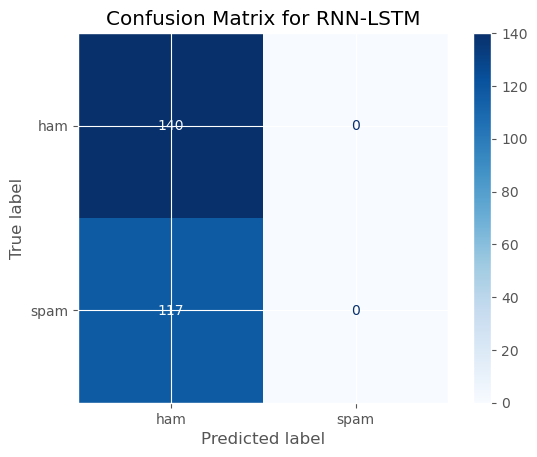

RNN-LSTM model metrics:
Accuracy: 0.5447
Precision: 0.7520
Recall: 0.5447
F1 Score: 0.3842

Classification Report for RNN-LSTM:
               precision    recall  f1-score   support

         ham       0.54      1.00      0.71       140
        spam       0.00      0.00      0.00       117

    accuracy                           0.54       257
   macro avg       0.27      0.50      0.35       257
weighted avg       0.30      0.54      0.38       257



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [110]:
# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.callbacks import EarlyStopping

# Define combined models (ensure model creation functions are implemented)
combined_models_2 = {
    'CNN-RNN': create_cnn_rnn_model(),
    'CNN-LSTM': create_cnn_lstm_model(),
    'RNN-LSTM': create_rnn_lstm_model()
}

class_labels = ['ham', 'spam']


# Initialize a dictionary to store classification reports and confusion matrices
reports = {}

# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

for name, model in combined_models_2.items():
    print(f"Training {name} model...")

    # Train the model with EarlyStopping callback and save the training history
    history = model.fit(
        X_train_pad,
        y_train,
        epochs=100,
        batch_size=32,
        validation_split=0.2,
        verbose=2,
        callbacks=[early_stopping]  # Add the callback here
    )
    history_combine[name] = history.history  # Save history

    # Evaluate the model on test data
    y_pred = (model.predict(X_test_pad) > 0.5).astype("int32").flatten()

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)


    metric_combine[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

    # Generate the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix
    plt.figure(figsize=(6, 4))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for {name}')
    plt.show()

    # Generate classification report
    report = classification_report(y_test, y_pred, target_names=class_labels)
    reports[name] = report

    print(f"{name} model metrics:\nAccuracy: {accuracy:.4f}\nPrecision: {precision:.4f}\nRecall: {recall:.4f}\nF1 Score: {f1:.4f}\n")
    print(f"Classification Report for {name}:\n", report)


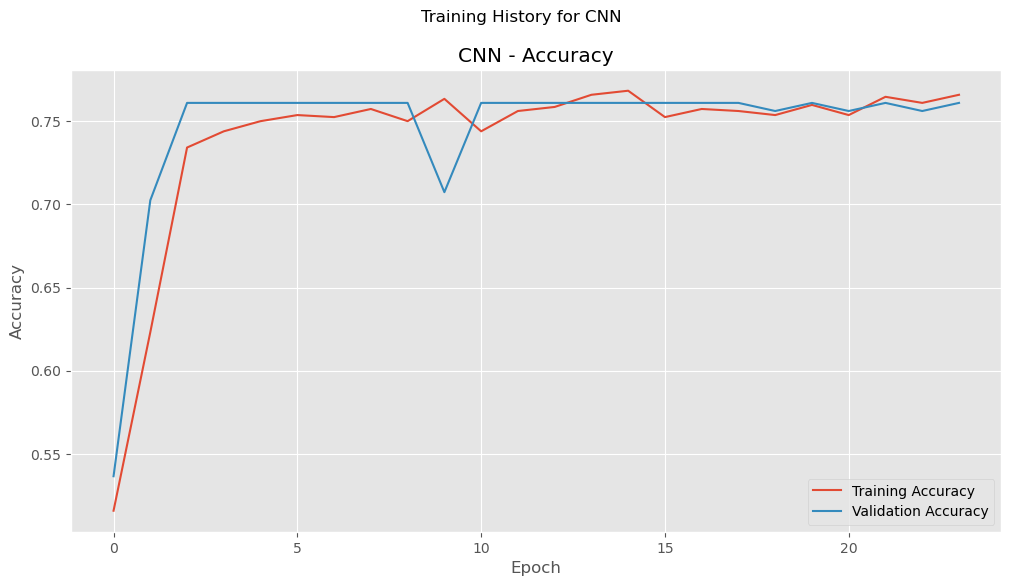

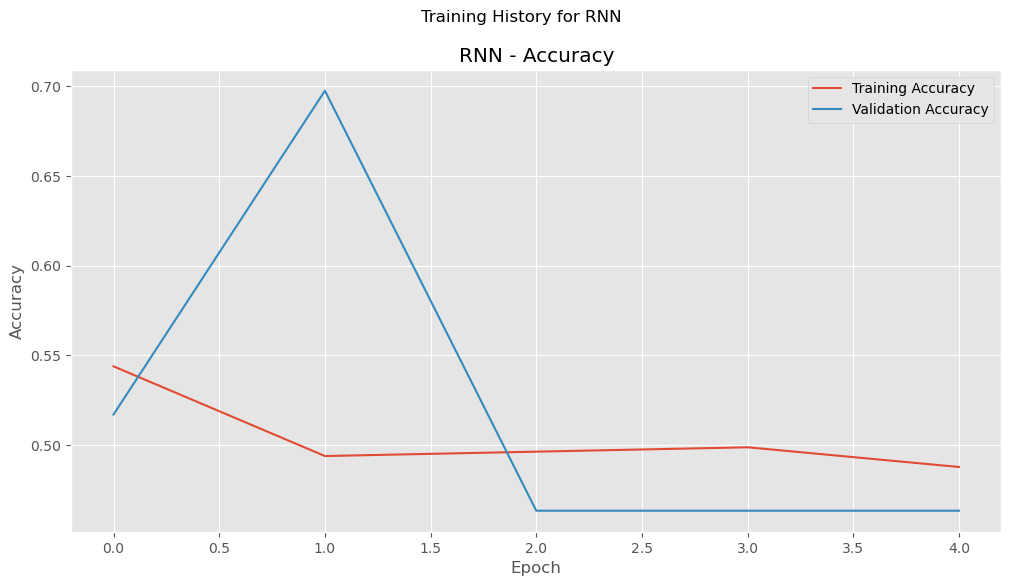

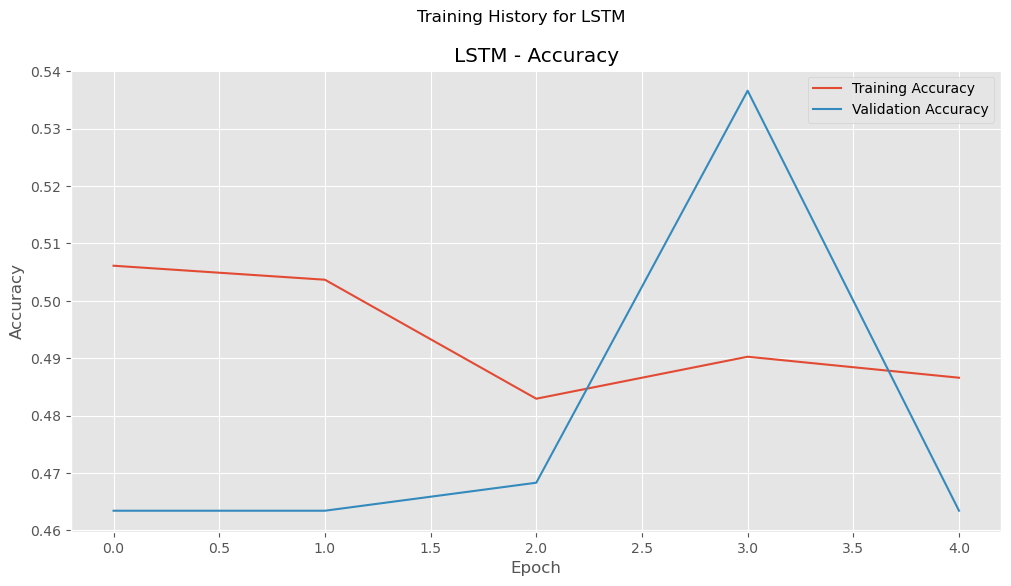

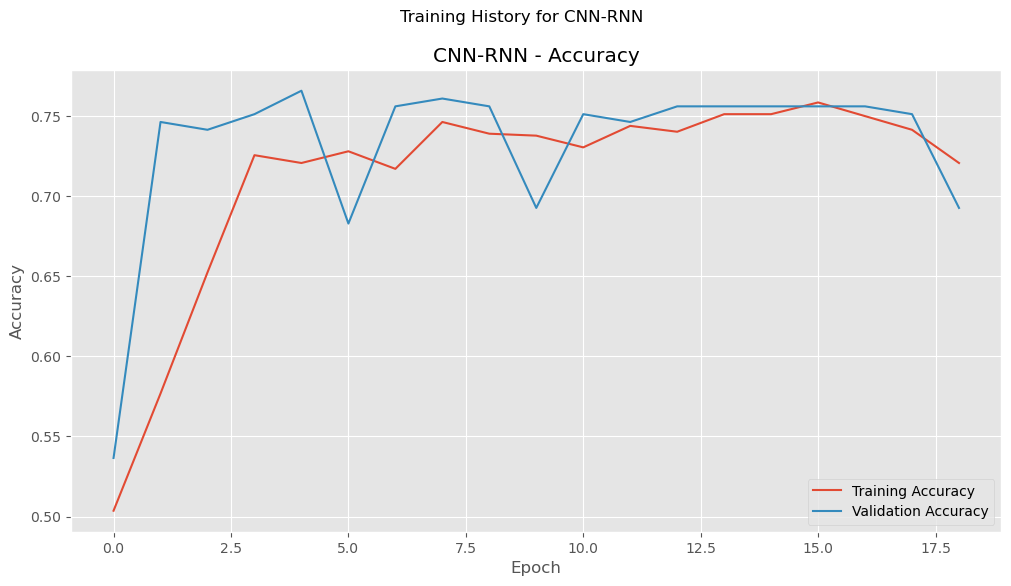

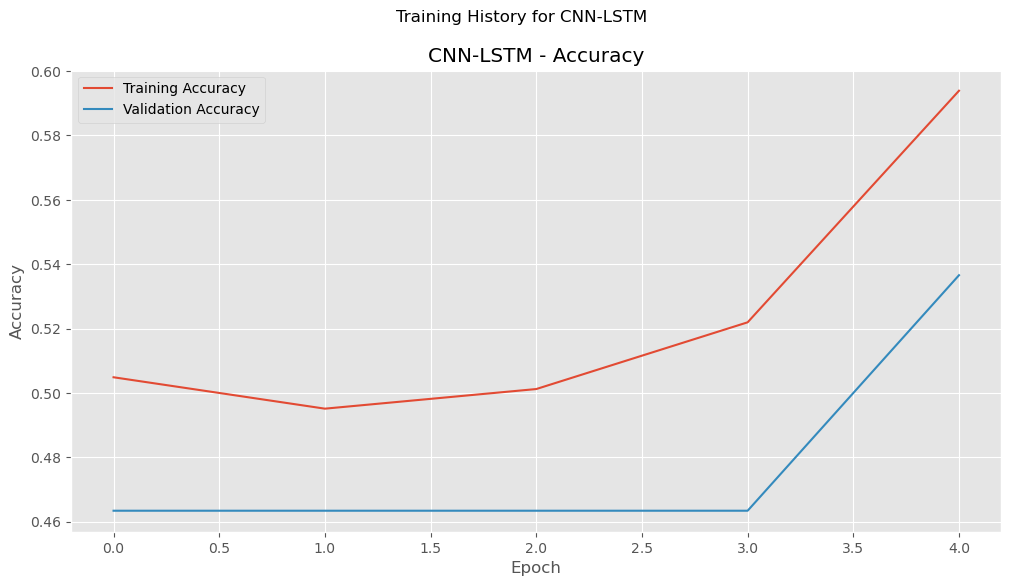

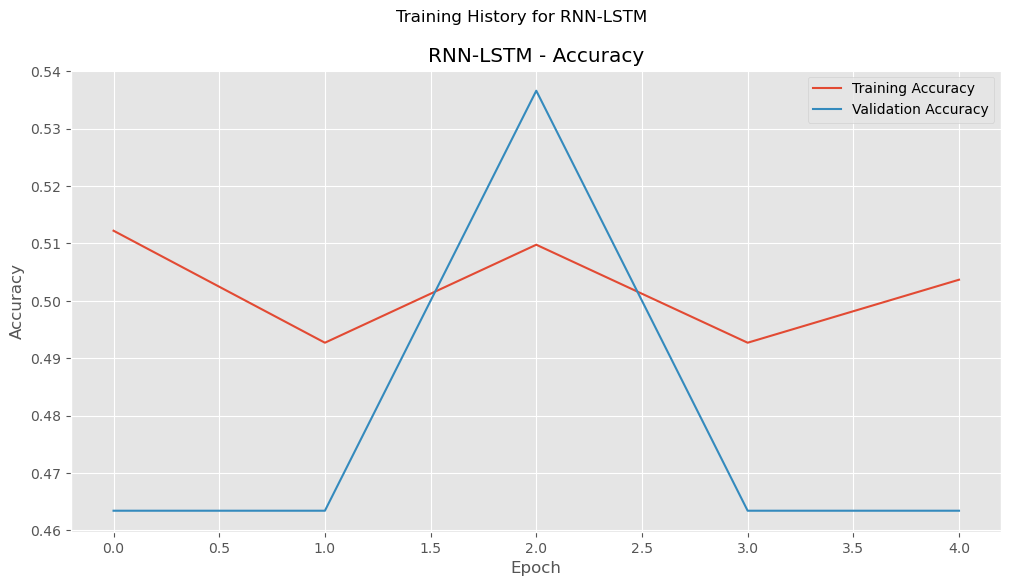

In [111]:

# Plot training history for each model
for name, history in history_combine.items():
    plt.figure(figsize=(12, 6))

    plt.plot(history['accuracy'], label='Training Accuracy')
    plt.plot(history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{name} - Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.suptitle(f'Training History for {name}')
    plt.show()

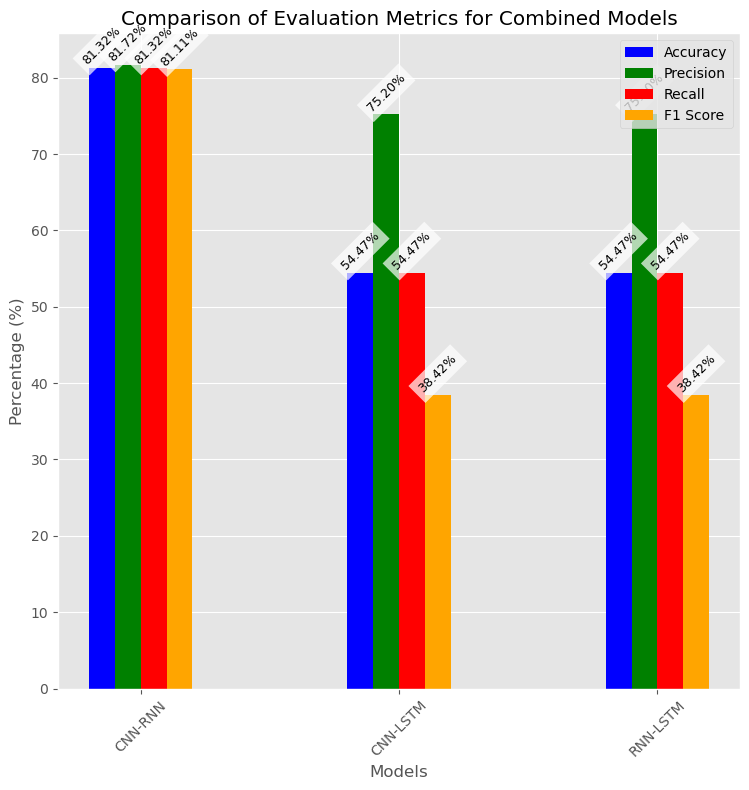

In [112]:
# Convert metrics dictionary to a DataFrame for easier plotting
metrics_df = pd.DataFrame(metric_combine).T.iloc[3:]

# Define plot size
plt.figure(figsize=(8, 8))

# Define bar width and positions
bar_width = 0.1
index = np.arange(len(metrics_df))

# Plot each metric
for i, metric in enumerate(metrics_df.columns):
    bars = plt.bar(index + i * bar_width, metrics_df[metric] * 100, bar_width,
                   label=metric, color=['blue', 'green', 'red', 'orange'][i])

    # Annotate bars with the exact percentage value
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.2f}%',
                 ha='center', va='bottom', fontsize=9, rotation=45, bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

# Adding labels and title
plt.xlabel('Models')
plt.ylabel('Percentage (%)')
plt.title('Comparison of Evaluation Metrics for Combined Models')

# Adjust x-axis labels to avoid overlap
plt.xticks(index + bar_width * (len(metrics_df.columns) / 2) - bar_width / 2, metrics_df.index, rotation=45)

# Adjust plot margins to ensure everything fits
plt.tight_layout(rect=[0, 0, 0.95, 1])  # Adjust the margins

plt.legend(loc='best')
plt.show()

##### Roc of Best Hybrid

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


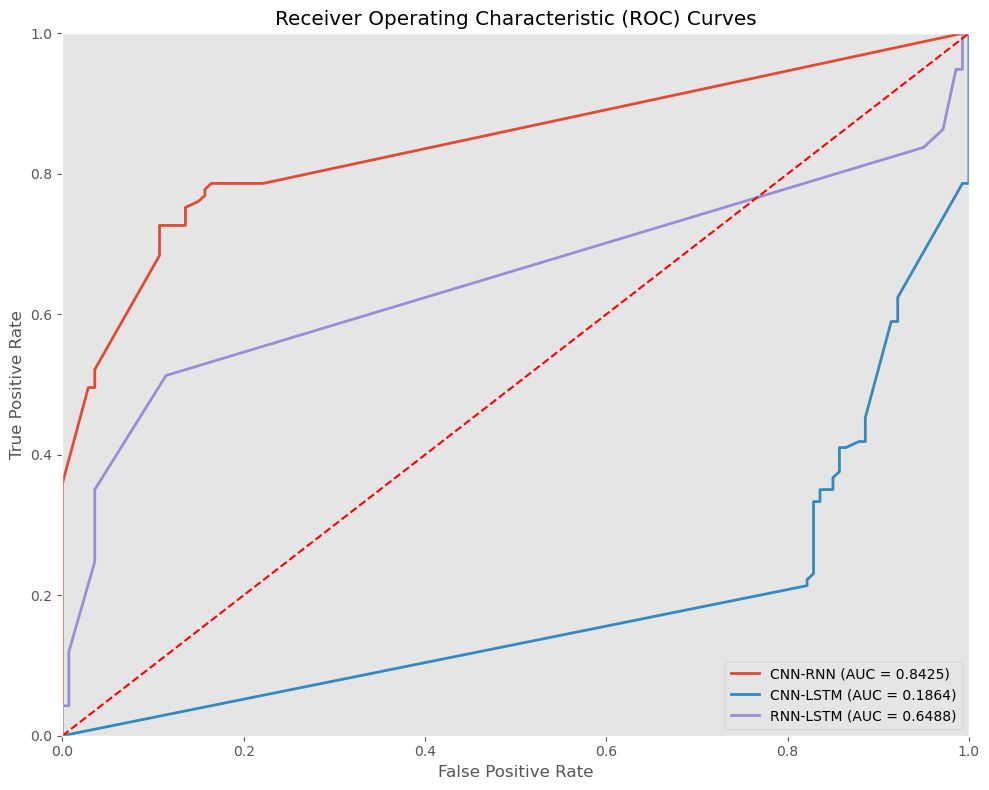

In [113]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Prepare the figure
plt.figure(figsize=(10, 8))

# Iterate over each model to compute and plot ROC curve
for model_name, model in combined_models_2.items():
    # Predict probabilities
    y_proba = model.predict(X_test_pad).flatten()

    # Calculate ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {roc_auc:.4f})')

# Plot the diagonal line (no redundant arguments)
plt.plot([0, 1], [0, 1], 'r--')

# Plot settings
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')
plt.grid(False)

# Show the plot
plt.tight_layout()
plt.show()


## **Comparison of All Models**

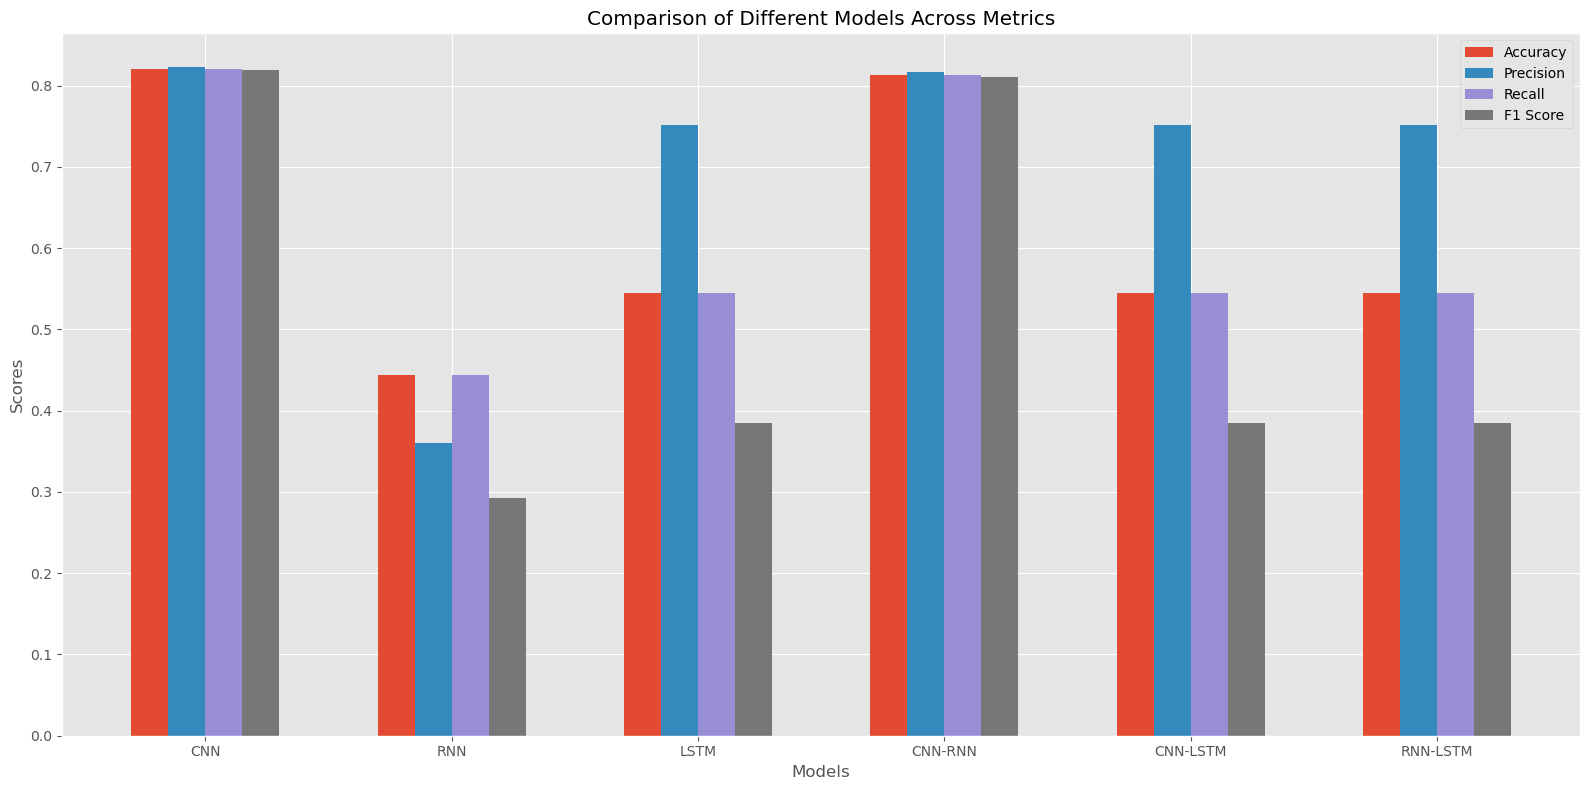

In [127]:

# Metrics for CNN, RNN, LSTM
cnn_metrics = metric_combine.get('CNN', {})
rnn_metrics = metric_combine.get('RNN', {})
lstm_metrics = metric_combine.get('LSTM', {})

# Combine metrics with combined models
combined_cnn_rnn_metrics = metric_combine.get('CNN-RNN', {})
combined_cnn_lstm_metrics = metric_combine.get('CNN-LSTM', {})
combined_rnn_lstm_metrics = metric_combine.get('RNN-LSTM', {})

# All metrics to compare
models = ['CNN', 'RNN', 'LSTM', 'CNN-RNN', 'CNN-LSTM', 'RNN-LSTM']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

# Create lists for metric values
metric_values = {metric: [] for metric in metrics}

# Populate metric values for each model
for model in models:
    if model == 'CNN':
        metrics_data = cnn_metrics
    elif model == 'RNN':
        metrics_data = rnn_metrics
    elif model == 'LSTM':
        metrics_data = lstm_metrics
    elif model == 'CNN-RNN':
        metrics_data = combined_cnn_rnn_metrics
    elif model == 'CNN-LSTM':
        metrics_data = combined_cnn_lstm_metrics
    elif model == 'RNN-LSTM':
        metrics_data = combined_rnn_lstm_metrics

    for metric in metrics:
        metric_values[metric].append(metrics_data.get(metric, 0))

# Set up bar width and positions
bar_width = 0.15
bar_positions = np.arange(len(models))

# Plot bars for each metric
plt.figure(figsize=(16, 8))
for i, metric in enumerate(metrics):
    plt.bar(
        bar_positions + i * bar_width,
        metric_values[metric],
        bar_width,
        label=metric
    )
    
    

# Add labels, title, and legend
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Comparison of Different Models Across Metrics')
plt.xticks(bar_positions + bar_width * (len(metrics) / 2 - 0.5), models)
plt.legend()

# Show plot
plt.tight_layout()
plt.show()


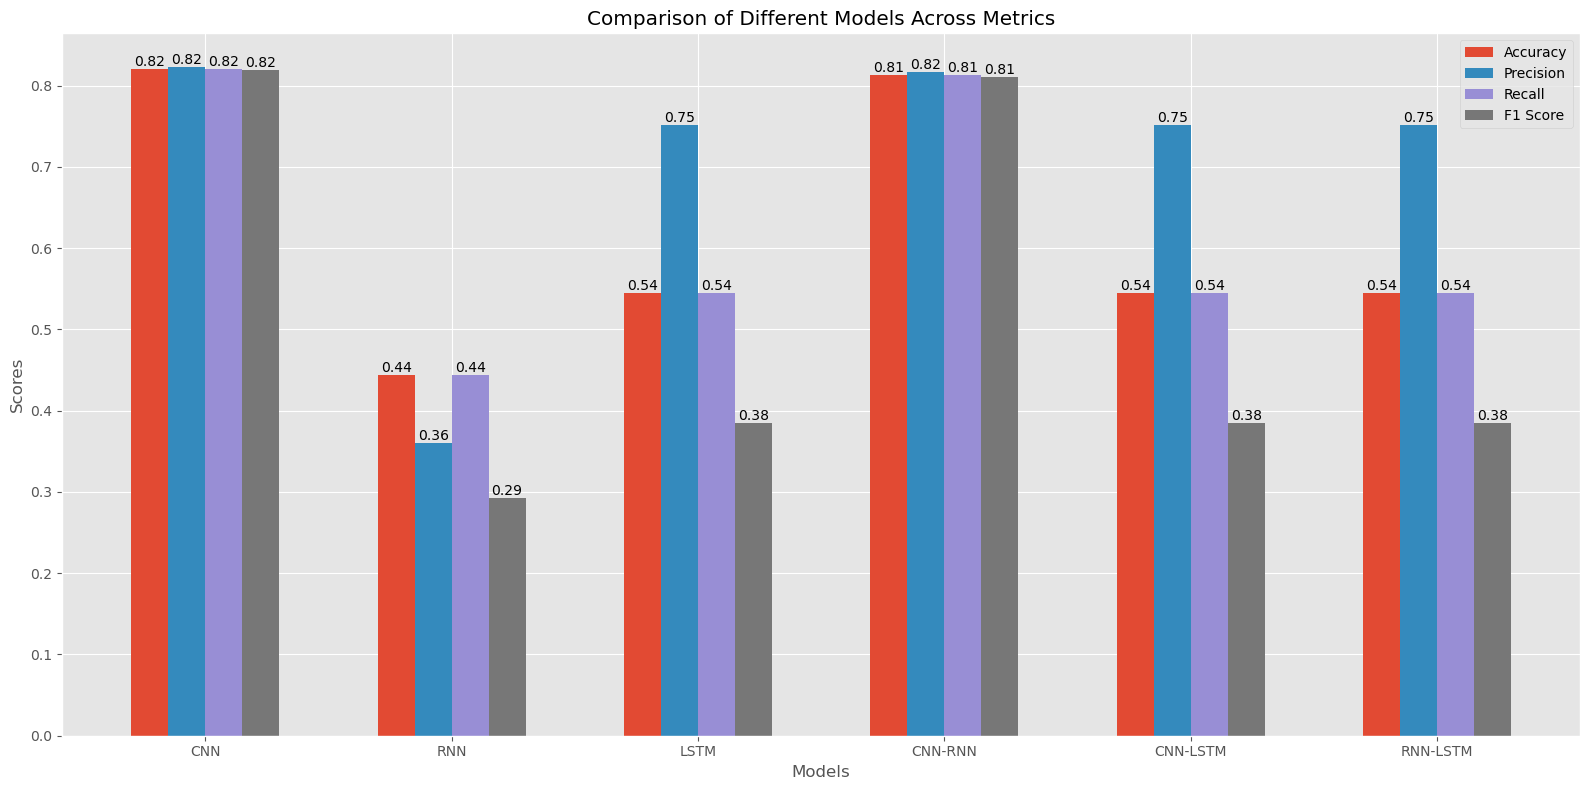

In [128]:
import numpy as np
import matplotlib.pyplot as plt

# Metrics for CNN, RNN, LSTM
cnn_metrics = metric_combine.get('CNN', {})
rnn_metrics = metric_combine.get('RNN', {})
lstm_metrics = metric_combine.get('LSTM', {})

# Combine metrics with combined models
combined_cnn_rnn_metrics = metric_combine.get('CNN-RNN', {})
combined_cnn_lstm_metrics = metric_combine.get('CNN-LSTM', {})
combined_rnn_lstm_metrics = metric_combine.get('RNN-LSTM', {})

# All metrics to compare
models = ['CNN', 'RNN', 'LSTM', 'CNN-RNN', 'CNN-LSTM', 'RNN-LSTM']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

# Create lists for metric values
metric_values = {metric: [] for metric in metrics}

# Populate metric values for each model
for model in models:
    if model == 'CNN':
        metrics_data = cnn_metrics
    elif model == 'RNN':
        metrics_data = rnn_metrics
    elif model == 'LSTM':
        metrics_data = lstm_metrics
    elif model == 'CNN-RNN':
        metrics_data = combined_cnn_rnn_metrics
    elif model == 'CNN-LSTM':
        metrics_data = combined_cnn_lstm_metrics
    elif model == 'RNN-LSTM':
        metrics_data = combined_rnn_lstm_metrics

    for metric in metrics:
        metric_values[metric].append(metrics_data.get(metric, 0))

# Set up bar width and positions
bar_width = 0.15
bar_positions = np.arange(len(models))

# Plot bars for each metric
plt.figure(figsize=(16, 8))
for i, metric in enumerate(metrics):
    bars = plt.bar(
        bar_positions + i * bar_width,
        metric_values[metric],
        bar_width,
        label=metric
    )

    # Annotate each bar with its value
    for bar in bars:
        yval = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,  # X position (center of the bar)
            yval,                               # Y position (height of the bar)
            f'{yval:.2f}',                     # Value formatted to 2 decimal places
            ha='center',                        # Horizontal alignment
            va='bottom'                         # Vertical alignment (above the bar)
        )

# Add labels, title, and legend
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Comparison of Different Models Across Metrics')
plt.xticks(bar_positions + bar_width * (len(metrics) / 2 - 0.5), models)
plt.legend()

# Show plot
plt.tight_layout()
plt.show()



### **Patterns of Misclassified Emails**



In [115]:
def display_misclassified_emails(misclassified_indices, X_test_pad, y_test, y_pred):
    for idx in misclassified_indices[:10]:  # Adjust the slice to control how many emails you want to display
        email_content = X_test_pad[idx][:10]  # Display the first 50 tokens
        true_label = y_test[idx]
        predicted_label = y_pred[idx]

        print(f"Email (first 50 tokens): {email_content}")
        print(f"True Label: {true_label}, Predicted Label: {predicted_label}")
        print("\n---\n")


In [116]:
# For RNN Model

y_pred = model_rnn.predict(X_test_pad)

# Compare y_test with the first column of y_pred since it is a 2D array
misclassified_indices = y_test != y_pred[:,0]
misclassified_emails = X_test_pad[misclassified_indices]
misclassified_labels = y_test[misclassified_indices]
misclassified_predictions = y_pred[misclassified_indices]

for email, true_label, predicted_label in zip(misclassified_emails, misclassified_labels, misclassified_predictions):
    print(f"Email: {email}")
    print(f"True Label: {true_label}, Predicted Label: {predicted_label}")
    print("\n")

# Get indices of misclassified emails
misclassified_indices = np.where(y_test != y_pred)[0]

# Display a sample of misclassified emails
display_misclassified_emails(misclassified_indices, X_test_pad, y_test, y_pred)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Email: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1
 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
True Label: 1, Predicted Label: [0.5176767]


Email: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
True Label: 1, Predicted Label: [0.5326848]


Email: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 2 1 1 1 1 1

In [117]:
# For LSTM Model

y_pred = model_lstm.predict(X_test_pad)

# Compare y_test with the first column of y_pred since it is a 2D array
misclassified_indices = y_test != y_pred[:,0]
misclassified_emails = X_test_pad[misclassified_indices]
misclassified_labels = y_test[misclassified_indices]
misclassified_predictions = y_pred[misclassified_indices]

for email, true_label, predicted_label in zip(misclassified_emails, misclassified_labels, misclassified_predictions):
    print(f"Email: {email}")
    print(f"True Label: {true_label}, Predicted Label: {predicted_label}")
    print("\n")

# Get indices of misclassified emails
misclassified_indices = np.where(y_test != y_pred)[0]

# Display a sample of misclassified emails
display_misclassified_emails(misclassified_indices, X_test_pad, y_test, y_pred)

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step
Email: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1
 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
True Label: 1, Predicted Label: [0.4956893]


Email: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
True Label: 1, Predicted Label: [0.49568728]


Email: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 2 1 1 1 1 

In [118]:
# Assuming 'model_rnn_lstm' is your trained RNN-LSTM model object
y_pred = model_rnn_lstm.predict(X_test_pad)

# Compare y_test with the first column of y_pred since it is a 2D array
misclassified_indices = y_test != y_pred[:,0]
misclassified_emails = X_test_pad[misclassified_indices]
misclassified_labels = y_test[misclassified_indices]
misclassified_predictions = y_pred[misclassified_indices]

for email, true_label, predicted_label in zip(misclassified_emails, misclassified_labels, misclassified_predictions):
    print(f"Email: {email}")
    print(f"True Label: {true_label}, Predicted Label: {predicted_label}")
    print("\n")

# Get indices of misclassified emails
misclassified_indices = np.where(y_test != y_pred)[0]

# Display a sample of misclassified emails
display_misclassified_emails(misclassified_indices, X_test_pad, y_test, y_pred)

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step
Email: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1
 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
True Label: 1, Predicted Label: [0.5262462]


Email: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
True Label: 1, Predicted Label: [0.5269799]


Email: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 2 1 1 1 1 1

In [119]:
# For CNN-LSTM Model

y_pred = model_cnn_lstm.predict(X_test_pad)

# Compare y_test with the first column of y_pred since it is a 2D array
misclassified_indices = y_test != y_pred[:,0]
misclassified_emails = X_test_pad[misclassified_indices]
misclassified_labels = y_test[misclassified_indices]
misclassified_predictions = y_pred[misclassified_indices]

for email, true_label, predicted_label in zip(misclassified_emails, misclassified_labels, misclassified_predictions):
    print(f"Email: {email}")
    print(f"True Label: {true_label}, Predicted Label: {predicted_label}")
    print("\n")

# Get indices of misclassified emails
misclassified_indices = np.where(y_test != y_pred)[0]

# Display a sample of misclassified emails
display_misclassified_emails(misclassified_indices, X_test_pad, y_test, y_pred)

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step
Email: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1
 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
True Label: 1, Predicted Label: [0.49888724]


Email: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
True Label: 1, Predicted Label: [0.4987912]


Email: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 2 1 1 1 1 

In [122]:
X_test_pad.shape[1]

150

In [123]:
from tensorflow.keras.models import Sequential, load_model

# Save the model
model_cnn_rnn.save('cnn_rnn.h5')
print("Model saved as cnn_rnn.h5")

# Load the model
loaded_model = load_model('cnn_rnn.h5')
print("Model loaded from cnn_rnn.h5")

# Prepare input text for prediction
texts_to_predict = ["FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv",
                    "Even my brother is not like to speak with me. They treat me like aids patent."]
texts_seq = tokenizer.texts_to_sequences(texts_to_predict)
texts_pad = pad_sequences(texts_seq, maxlen=100, padding='post')

# Make predictions
y_pred = loaded_model.predict(texts_pad)
predicted_labels = (y_pred > 0.5).astype(int)  # Convert probabilities to binary labels

# Display predictions
for text, label in zip(texts_to_predict, predicted_labels):
    print(f"Text: {text}, Predicted Label: {label[0]}")

Model saved as cnn_rnn.h5
Model loaded from cnn_rnn.h5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
Text: FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv, Predicted Label: 1
Text: Even my brother is not like to speak with me. They treat me like aids patent., Predicted Label: 1
